In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
import os

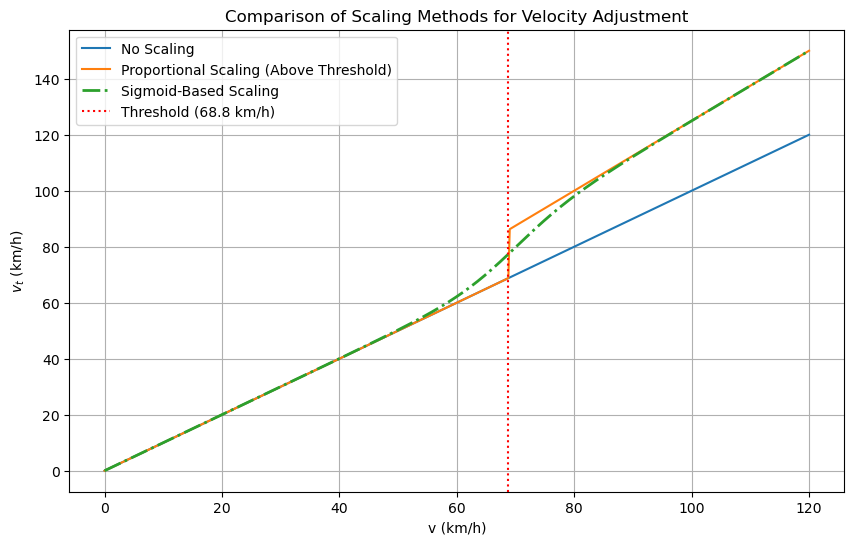

In [8]:
def plot_scaling_methods(threshold, scaling_factor, v_min, v_max):
    """
    Plots the difference between proportional scaling above the threshold, 
    threshold-based scaling, and sigmoid-based smooth adjustment.

    Parameters:
        threshold (float): Velocity below which no scaling is applied.
        scaling_factor (float): Ratio of new speed limit to original speed limit.
        v_min (float): Minimum velocity for the range.
        v_max (float): Maximum velocity for the range.
    """
    # Define velocity range
    velocities = np.linspace(v_min, v_max, 500)
    
    # Proportional scaling above the threshold
    proportional_scaled = np.where(
        velocities > threshold, velocities * scaling_factor, velocities
    )
    
    # Threshold-based scaling
    threshold_scaled = np.where(velocities > threshold, threshold + (velocities - threshold) * scaling_factor, velocities)
    
    # Sigmoid-based scaling
    # Smooth transition using a logistic sigmoid function
    width=5
    weight = 1 / (1 + np.exp(-(velocities - threshold) / width))  # Sigmoid function for smooth transition
    rescaled_velocity = scaling_factor * velocities
    sigmoid_scaled =  (1 - weight) * velocities + weight * rescaled_velocity
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(velocities, velocities, label="No Scaling", linestyle='-')
    plt.plot(velocities, proportional_scaled, label="Proportional Scaling (Above Threshold)")
    plt.plot(velocities, sigmoid_scaled, label="Sigmoid-Based Scaling", lw=2, linestyle='-.')
    plt.axvline(threshold, color='red', linestyle=':', label=f"Threshold ({threshold} km/h)")
    # Add labels and legend
    plt.xlabel(f"v (km/h)")
    plt.ylabel('$v_{t}$ (km/h)')
    plt.title("Comparison of Scaling Methods for Velocity Adjustment")
    plt.legend()
    plt.grid()
    plt.savefig(f"Smoothing_example.png")
    plt.show()

# Example Usage
plot_scaling_methods(threshold=68.8, scaling_factor=1.25, v_min=0, v_max=120)

In [9]:
vehicles = {
    'MHG998': {'mass': 5250, 'drag_coefficient': 0.70,'area': 5.285,'r0': 0.01057, 'r1': 0.00008686,'class': 'Truck','80_thres':75.8, '90_thres':84.9, '100_thres':83.3,'80_thres_smo':72.57, '90_thres_smo':81.66, '100_thres_smo':79.09,'ratio_class':1.0149,'ratio_plate':1.0149,'std_class':0.46,'std_plate':0.46}, #MHG998  
    'JSJ858': {'mass': 2040, 'drag_coefficient': 0.34,'area': 2.46,'r0': 0.00872, 'r1': 0.000101,'class': 'Car','80_thres':75.2, '90_thres':93.3, '100_thres':88.5,'80_thres_smo':71.92, '90_thres_smo':91.03, '100_thres_smo':84.19,'ratio_class':1.0309,'ratio_plate':0.8762,'std_class':0.27,'std_plate':0.36}, #JSJ858
    'LDG161': {'mass': 2030, 'drag_coefficient': 0.34,'area': 2.46,'r0': 0.00881, 'r1': 0.000102,'class': 'Car','80_thres':73.3, '90_thres':97, '100_thres':94,'80_thres_smo':69.98, '90_thres_smo':94.53, '100_thres_smo':90.64,'ratio_class':1.0309,'ratio_plate':1.154,'std_class':0.27,'std_plate':0.17},   #LDG161
    'DLZ695': {'mass': 2020, 'drag_coefficient': 0.37,'area': 2.472,'r0': 0.01, 'r1': 0.000225,'class': 'SUV','80_thres':79.4, '90_thres':96.8, '100_thres':83.2,'80_thres_smo':76.16, '90_thres_smo':92.99, '100_thres_smo':78.32,'ratio_class':0.8976,'ratio_plate':1.194,'std_class':0.20,'std_plate':0.31},#DLZ695
    'HLW912': {'mass': 2275, 'drag_coefficient': 0.47526,'area': 2.506,'r0': 0.01, 'r1': 0.000225,'class': 'SUV','80_thres':75, '90_thres':9999, '100_thres':74.9,'80_thres_smo':70.84, '90_thres_smo':9999, '100_thres_smo':70.25,'ratio_class':0.8976,'ratio_plate':0.9273,'std_class':0.20,'std_plate':0.18},#HLW912
    'HQW812': {'mass': 2275, 'drag_coefficient': 0.47526,'area': 2.506,'r0': 0.01, 'r1': 0.000225,'class': 'SUV','80_thres':81, '90_thres':87, '100_thres':89.3,'80_thres_smo':78.27, '90_thres_smo':68.30, '100_thres_smo':85.15,'ratio_class':0.8976,'ratio_plate':0.9064,'std_class':0.20,'std_plate':0.14}, #HQW812
    'JRK947': {'mass': 2275, 'drag_coefficient': 0.47526,'area': 2.506,'r0': 0.01, 'r1': 0.000225,'class': 'SUV','80_thres':77.4, '90_thres':95, '100_thres':85.4,'80_thres_smo':74.23, '90_thres_smo':91.64, '100_thres_smo':80.58,'ratio_class':0.8976,'ratio_plate':0.7932,'std_class':0.20,'std_plate':0.12}, #JRK947
    'KMR237': {'mass': 2275, 'drag_coefficient': 0.47526,'area': 2.506,'r0': 0.01, 'r1': 0.000225,'class': 'SUV','80_thres':79.6, '90_thres':9999, '100_thres':93.7,'80_thres_smo':76.87, '90_thres_smo':9999, '100_thres_smo':89.64,'ratio_class':0.8976,'ratio_plate':0.7848,'std_class':0.20,'std_plate':9999}, #KMR237
    'KSU878': {'mass': 2275, 'drag_coefficient': 0.47526,'area': 2.506,'r0': 0.01, 'r1': 0.000225,'class': 'SUV','80_thres':76.1, '90_thres':88, '100_thres':80.5,'80_thres_smo':72.04, '90_thres_smo':80.90, '100_thres_smo':76.47,'ratio_class':0.8976,'ratio_plate':0.9456,'std_class':0.20,'std_plate':0.21}, #KSU878
    'MGC95':  {'mass': 2275, 'drag_coefficient': 0.47526,'area': 2.506,'r0': 0.01, 'r1': 0.000225,'class': 'SUV','80_thres':78.9, '90_thres':94.6, '100_thres':94.4,'80_thres_smo':75.29, '90_thres_smo':92.04, '100_thres_smo':90.53,'ratio_class':0.8976,'ratio_plate':0.8294,'std_class':0.20,'std_plate':0.18},#MGC95
    'MCF324': {'mass': 2275, 'drag_coefficient': 0.47526,'area': 2.506,'r0': 0.01, 'r1': 0.000225,'class': 'SUV','80_thres':85.4, '90_thres':82.7, '100_thres':96.5,'80_thres_smo':82.10, '90_thres_smo':81.41, '100_thres_smo':92.83,'ratio_class':0.8976,'ratio_plate':0.9127,'std_class':0.20,'std_plate':0.12}, #MCF324
    'JZD724': {'mass': 2275, 'drag_coefficient': 0.47526,'area': 2.506,'r0': 0.01, 'r1': 0.000225,'class': 'SUV','80_thres':76.7, '90_thres':9999, '100_thres':84.7,'80_thres_smo':73.69, '90_thres_smo':9999, '100_thres_smo':80.67,'ratio_class':0.8976,'ratio_plate':0.8997,'std_class':0.20,'std_plate':0.14}, #JZD724
    'LWY799': {'mass': 2275, 'drag_coefficient': 0.47526,'area': 2.506,'r0': 0.01, 'r1': 0.000225,'class': 'SUV','80_thres':73, '90_thres':93.3, '100_thres':83,'80_thres_smo':68.76, '90_thres_smo':89.91, '100_thres_smo':78.58,'ratio_class':0.8976,'ratio_plate':0.8871,'std_class':0.20,'std_plate':0.46}} #LWY799

In [10]:
data = pd.DataFrame.from_dict(vehicles)
print(data)
#data.to_csv(f'Vehicle_vital_info.csv')

                    MHG998    JSJ858    LDG161    DLZ695    HLW912    HQW812  \
mass                  5250      2040      2030      2020      2275      2275   
drag_coefficient       0.7      0.34      0.34      0.37   0.47526   0.47526   
area                 5.285      2.46      2.46     2.472     2.506     2.506   
r0                 0.01057   0.00872   0.00881      0.01      0.01      0.01   
r1                0.000087  0.000101  0.000102  0.000225  0.000225  0.000225   
class                Truck       Car       Car       SUV       SUV       SUV   
80_thres              75.8      75.2      73.3      79.4        75        81   
90_thres              84.9      93.3        97      96.8      9999        87   
100_thres             83.3      88.5        94      83.2      74.9      89.3   
80_thres_smo         72.57     71.92     69.98     76.16     70.84     78.27   
90_thres_smo         81.66     91.03     94.53     92.99      9999      68.3   
100_thres_smo        79.09     84.19    

In [11]:
def merge_csvs(plate_number):
    folder_path = f"Vehicle_data/{plate_number}"
        
    if not os.path.exists(folder_path):
        raise FileNotFoundError(f"The directory {folder_path} does not exist.")

    merged_data = pd.DataFrame()  # Empty DataFrame to store merged data
    required_columns = ['speedLim_2', 'speedLim_6', 'velocity (km/h)']

    for file in os.listdir(folder_path):
        #print(f"Processing file: {file}")
        if file.endswith('.csv') and not file.startswith('N'):  # Exclude files starting with 'N'
            file_path = os.path.join(folder_path, file)
            try:
                # Read only the required columns
                df = pd.read_csv(file_path, usecols=required_columns)
                #print(f"DataFrame from {file} has {df.shape[0]} rows and {df.shape[1]} columns.")
                # Append to the merged DataFrame
                merged_data = pd.concat([merged_data, df], ignore_index=True)
            except ValueError as ve:
                print(f"Missing required columns in {file}. Skipping. Error: {ve}")
            except Exception as e:
                print(f"Error reading {file}: {e}")

    #print(f"Merged DataFrame has {merged_data.shape[0]} rows and {merged_data.shape[1]} columns.")
    return merged_data

In [12]:
def smooth_transition(velocity, threshold, scale, width=5):
    """
    Apply a smooth transition to the velocity based on a threshold and scaling factor.
    The sigmoid function is used for smooth adjustment.
    """
    weight = 1 / (1 + np.exp(-(velocity - threshold) / width))  # Sigmoid function for smooth transition
    rescaled_velocity = scale * velocity
    return (1 - weight) * velocity + weight * rescaled_velocity

Missing required columns in Smoothing_No_Speed_Changes_Crane Truck.csv. Skipping. Error: Usecols do not match columns, columns expected but not found: ['speedLim_6', 'velocity (km/h)', 'speedLim_2']


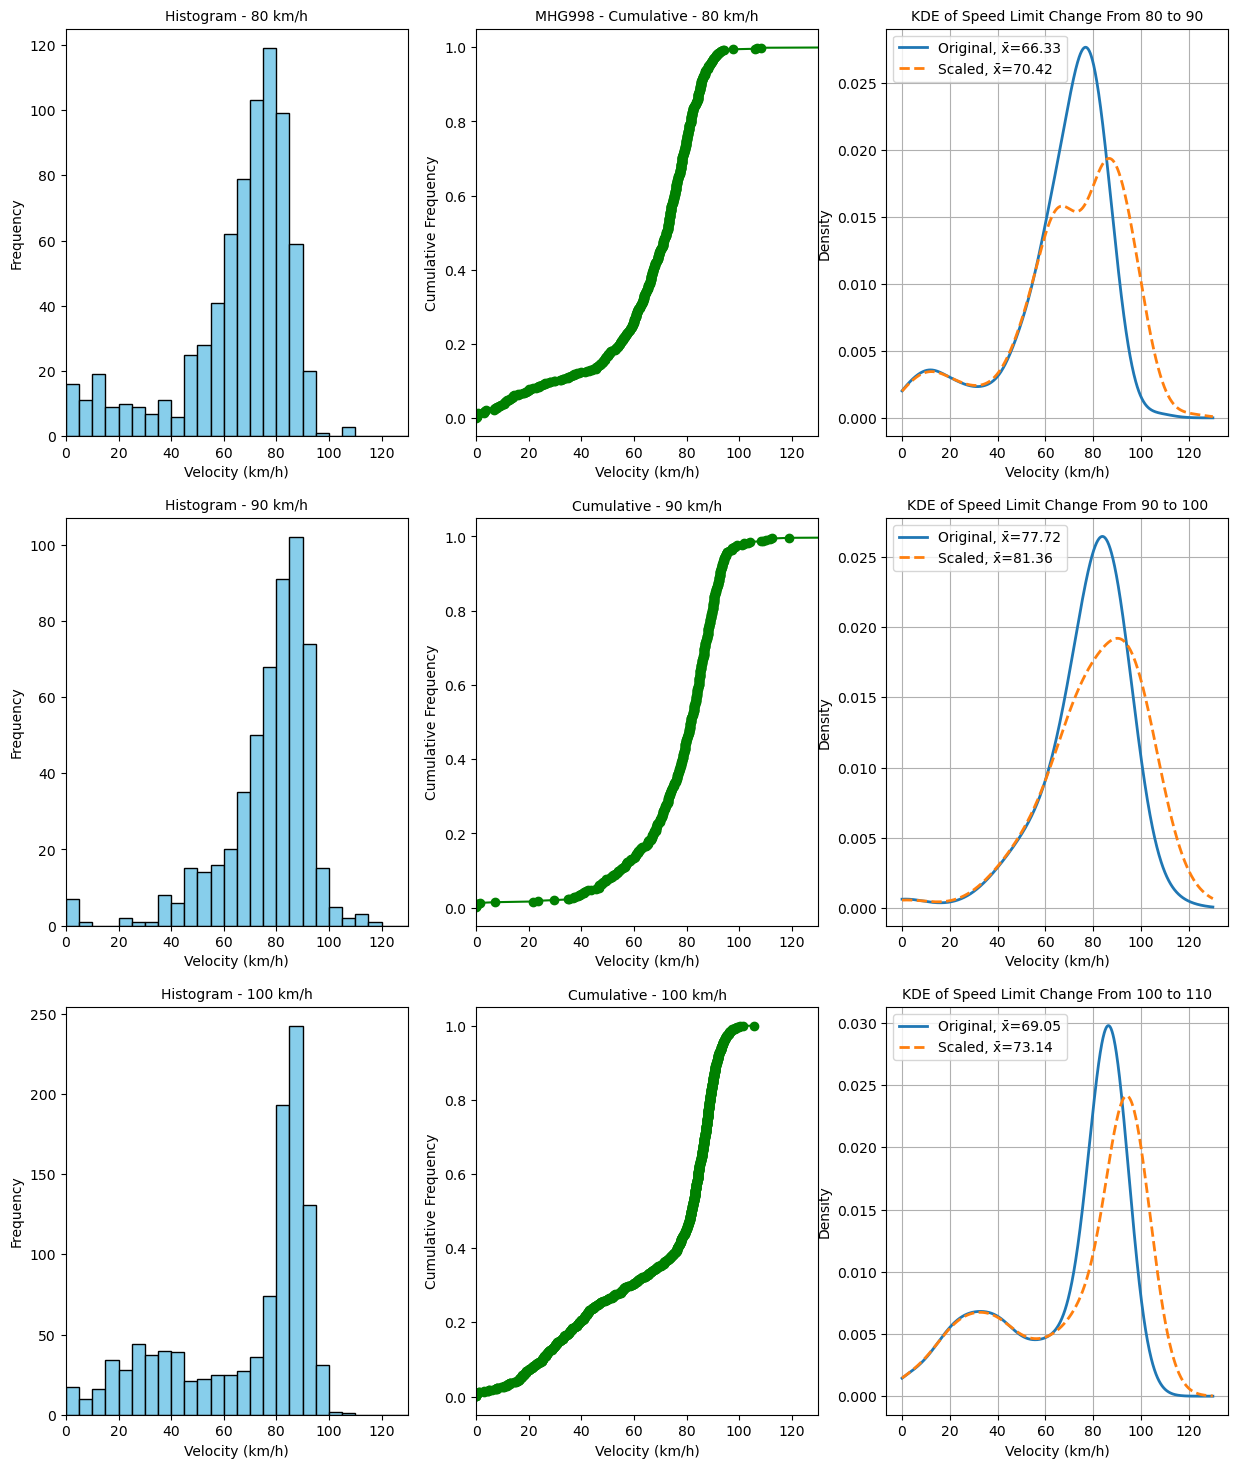

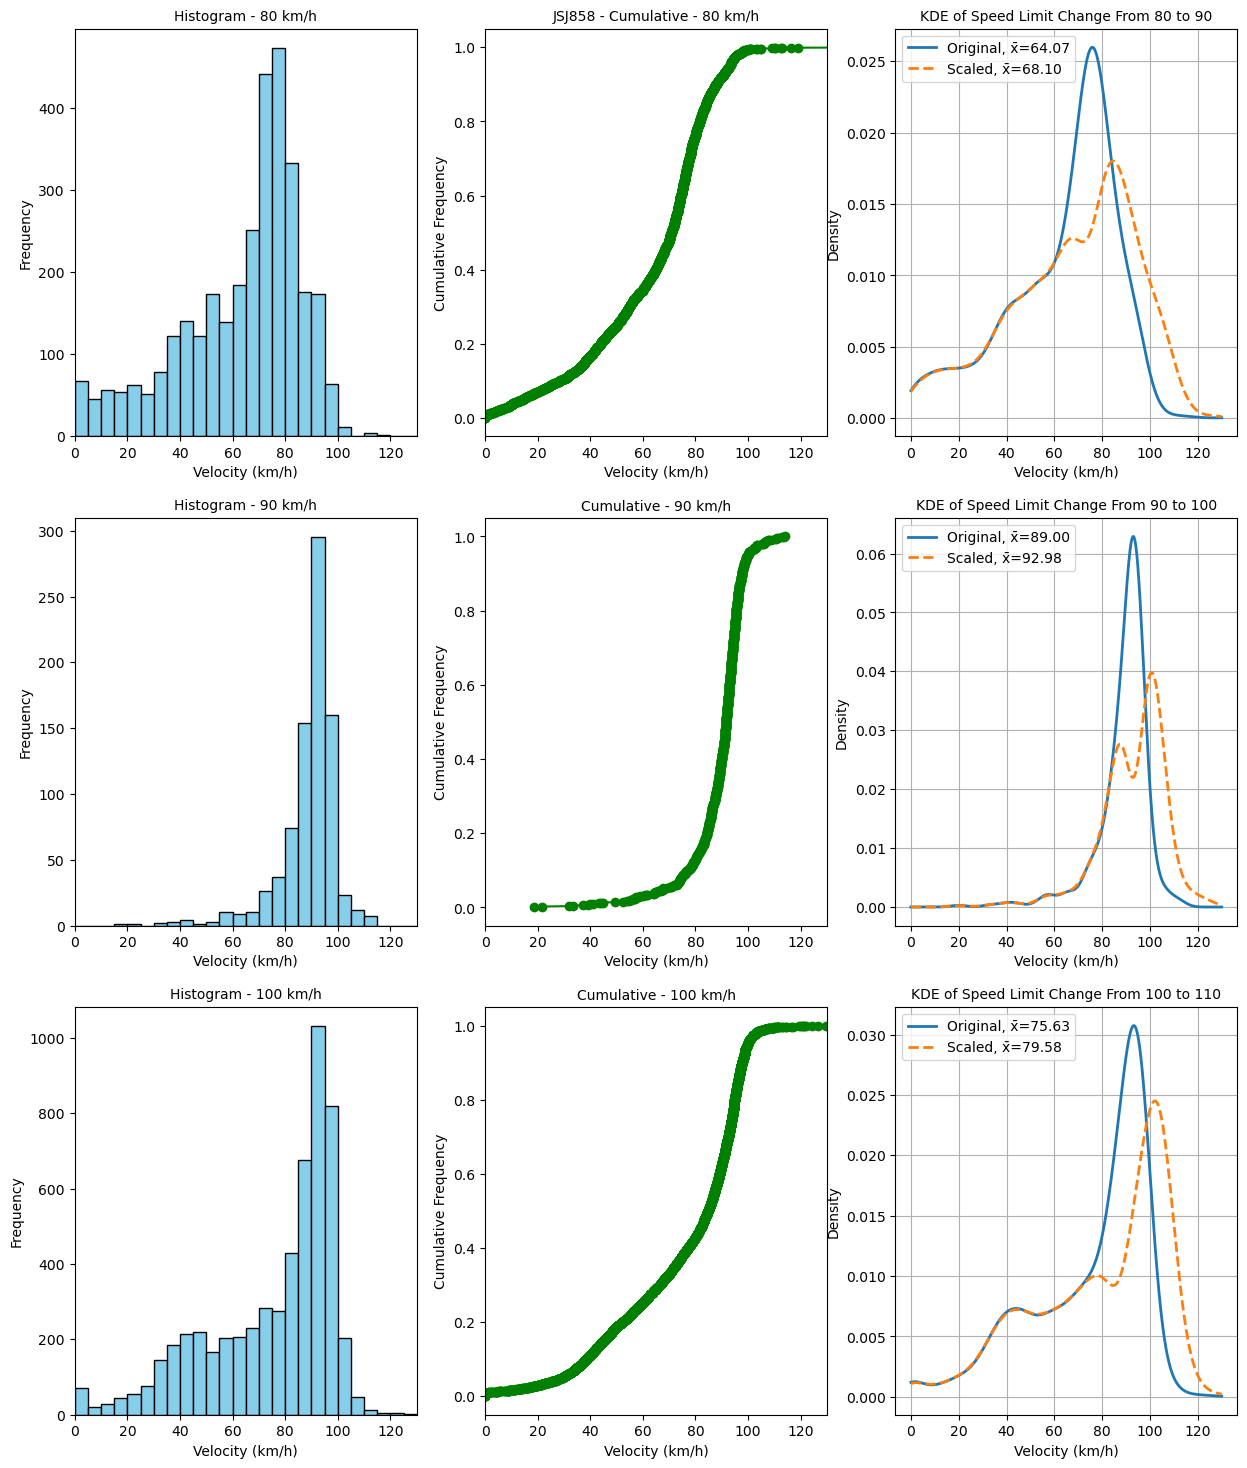

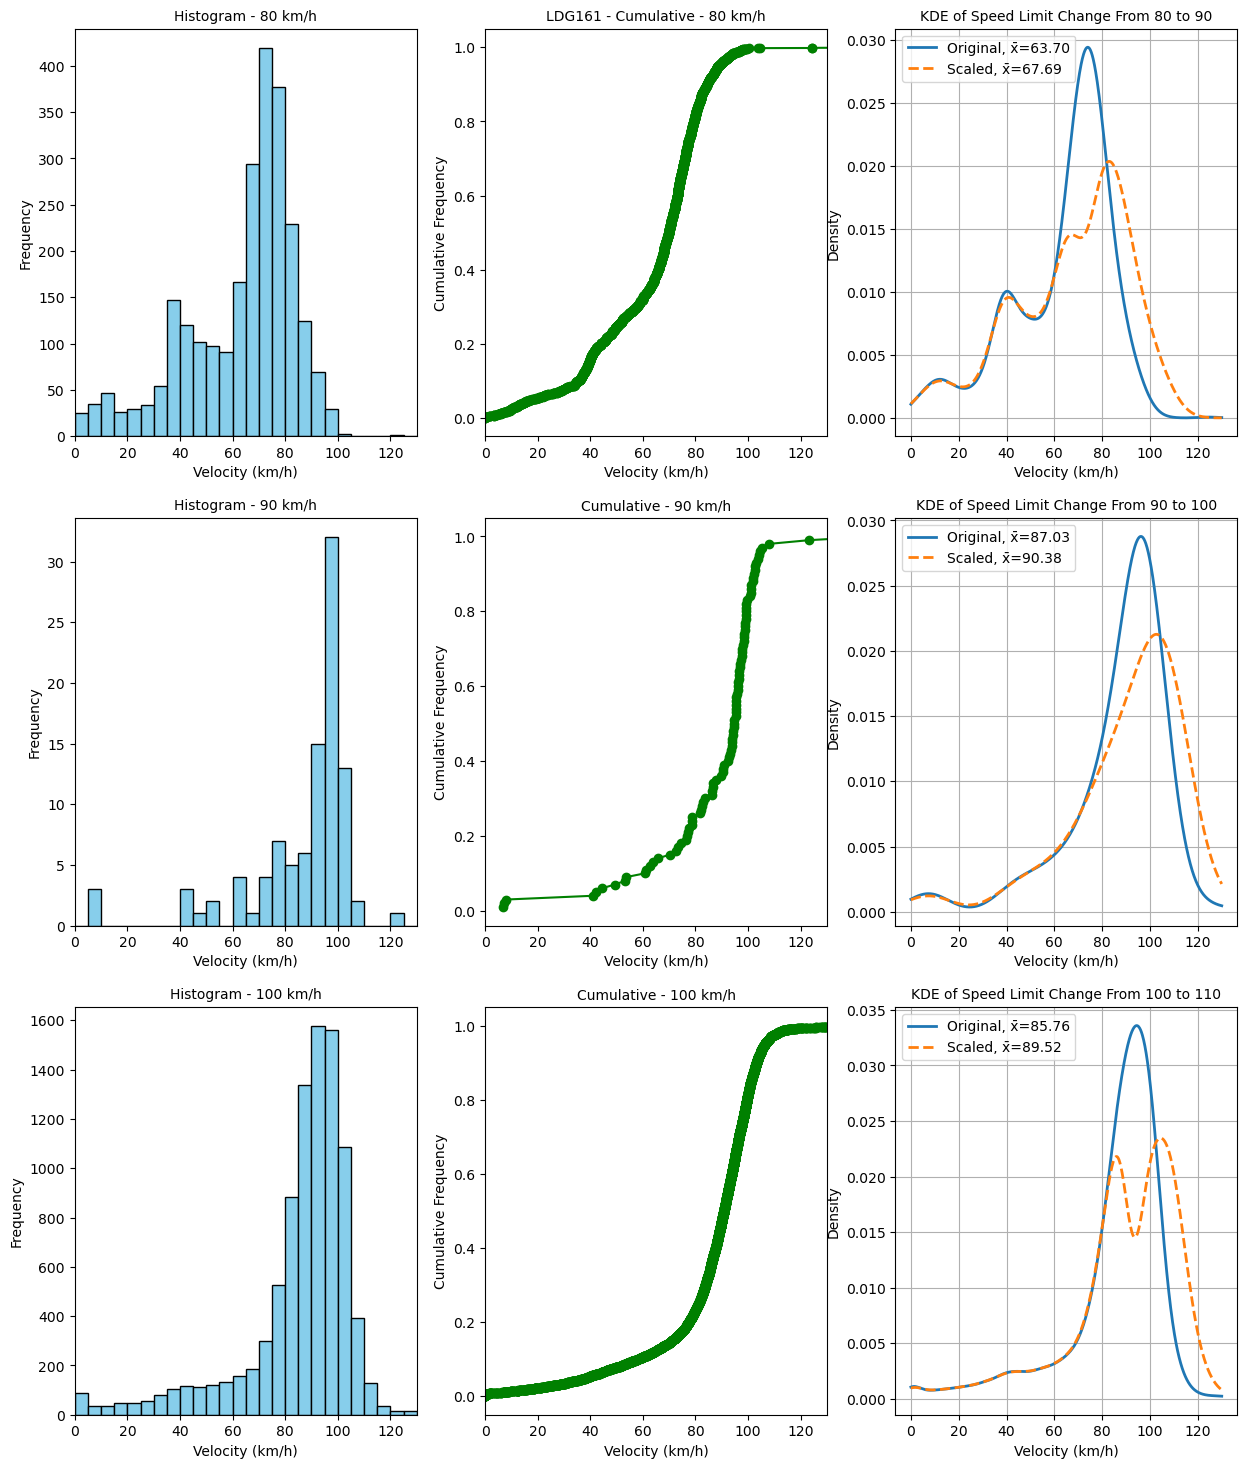

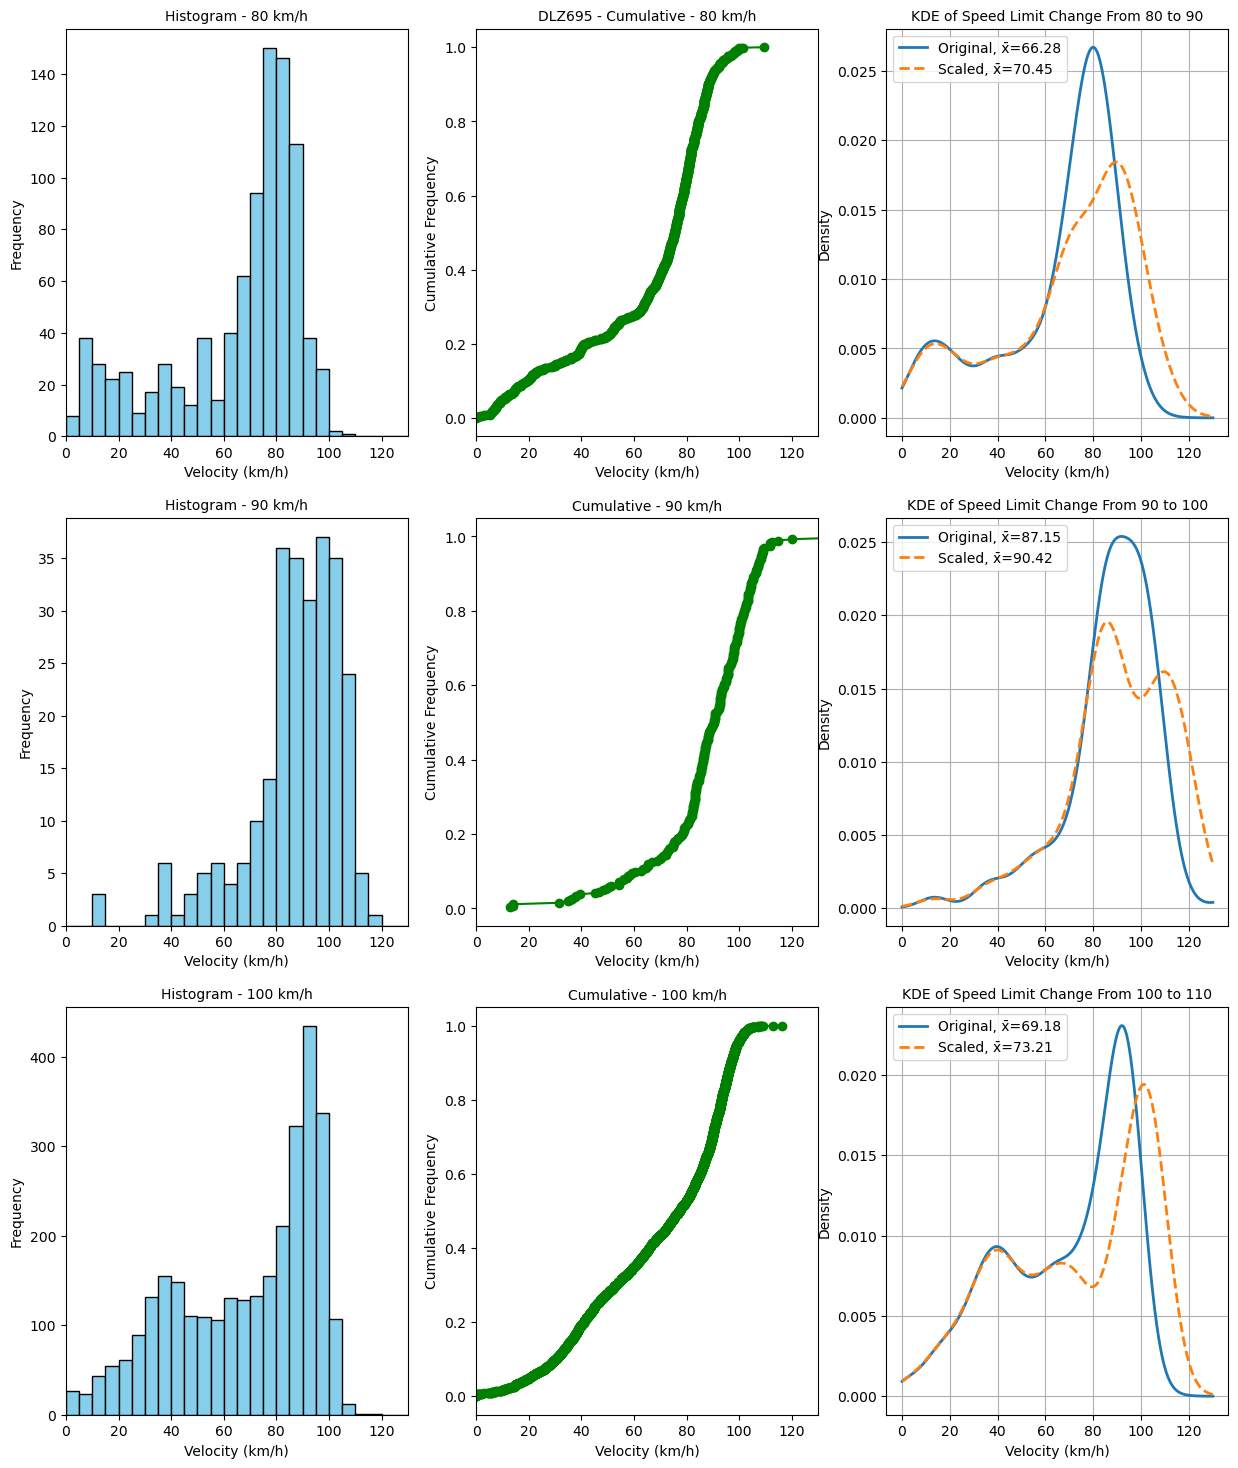

No data for plate HLW912 in 90 km/h zone.


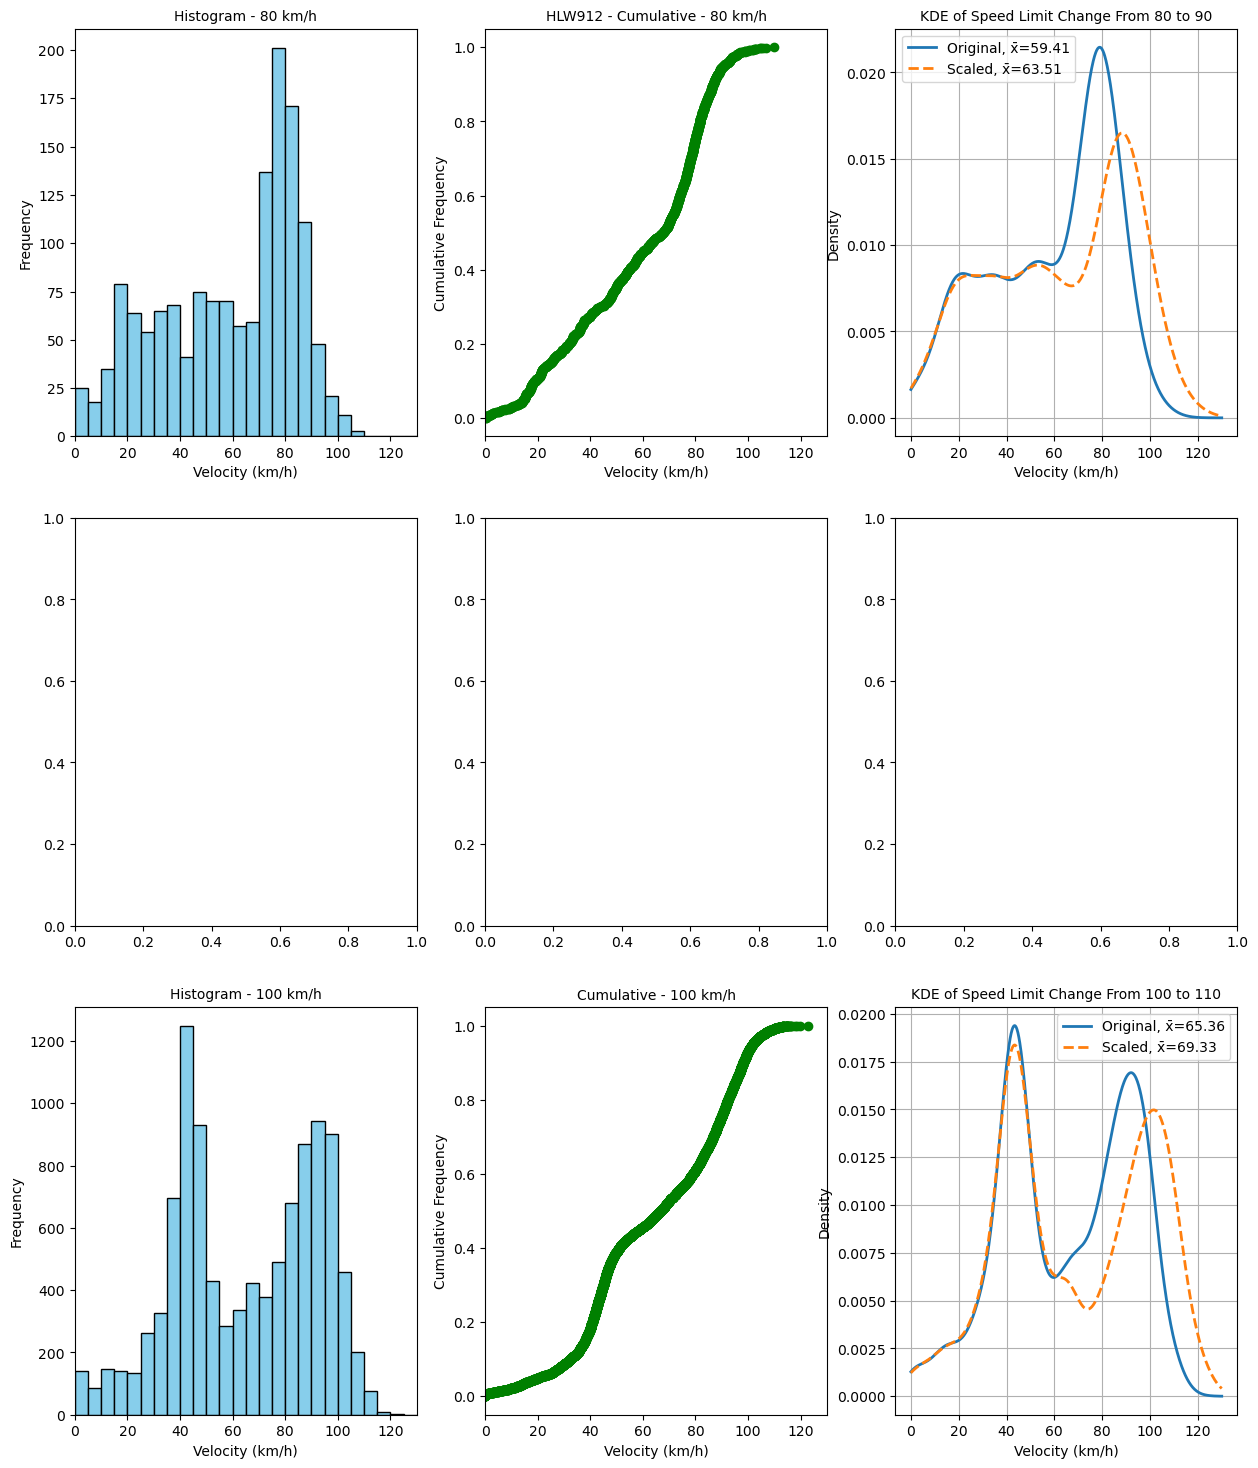

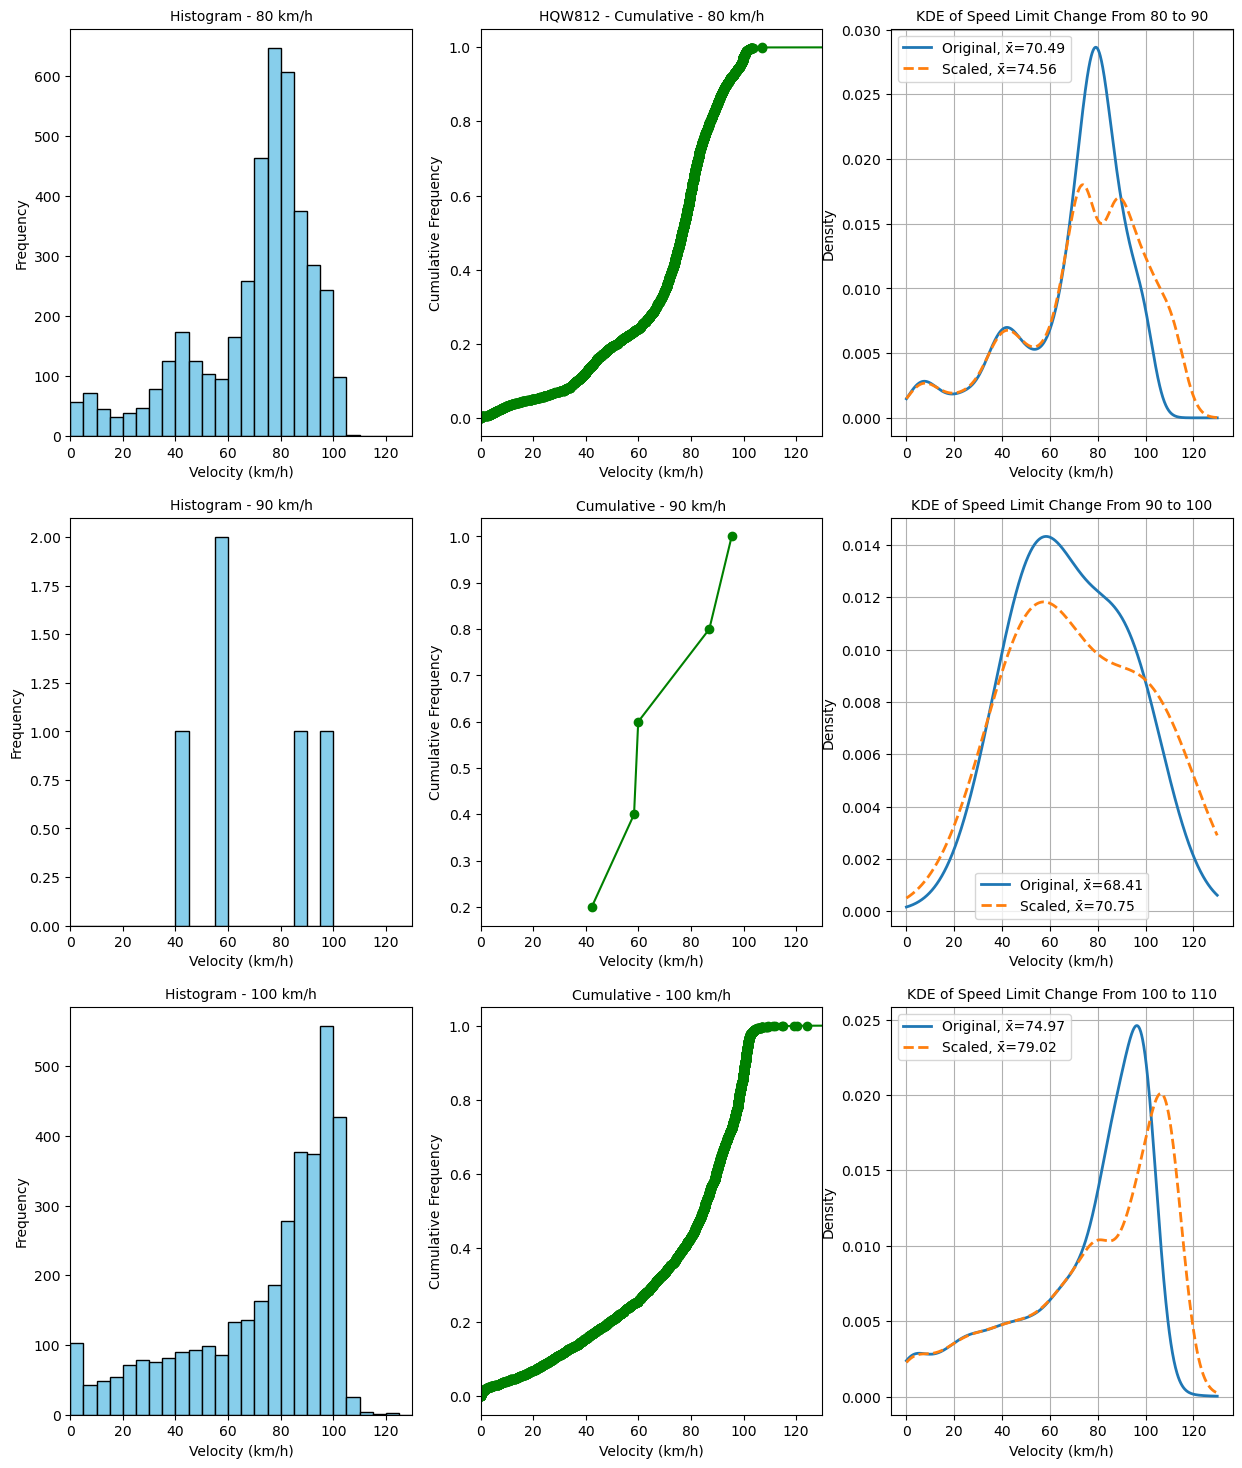

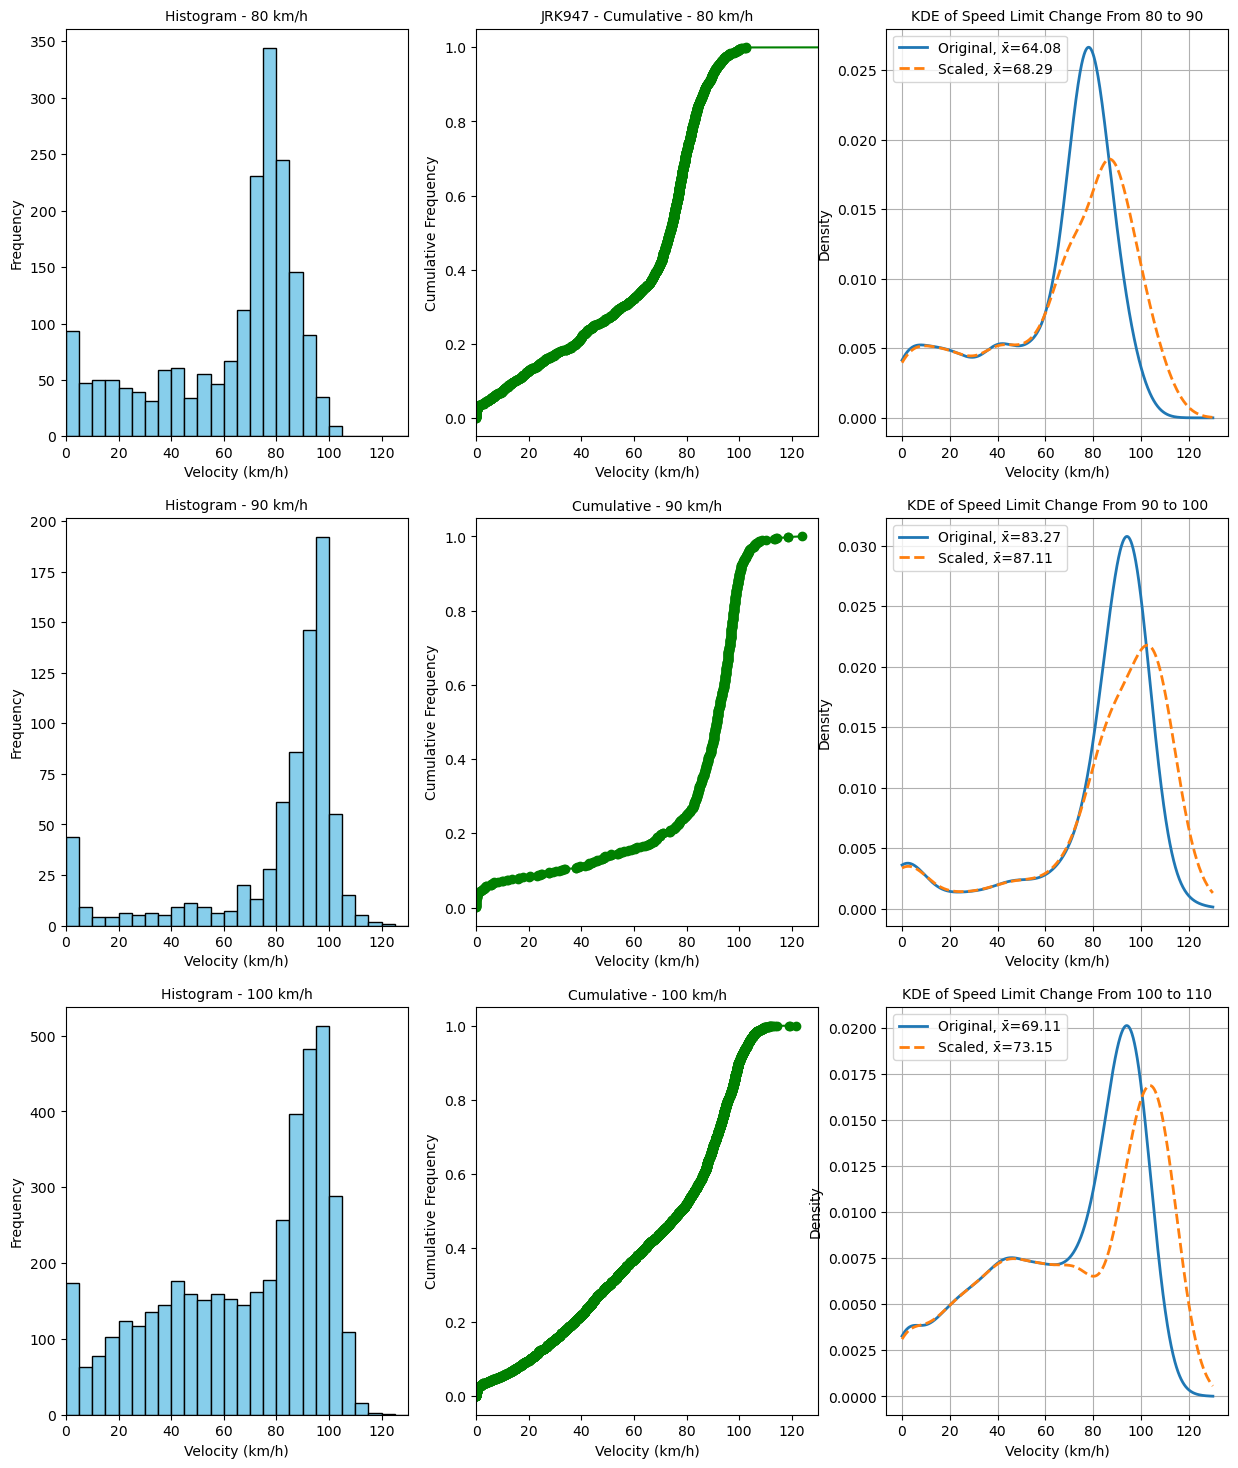

No data for plate KMR237 in 90 km/h zone.


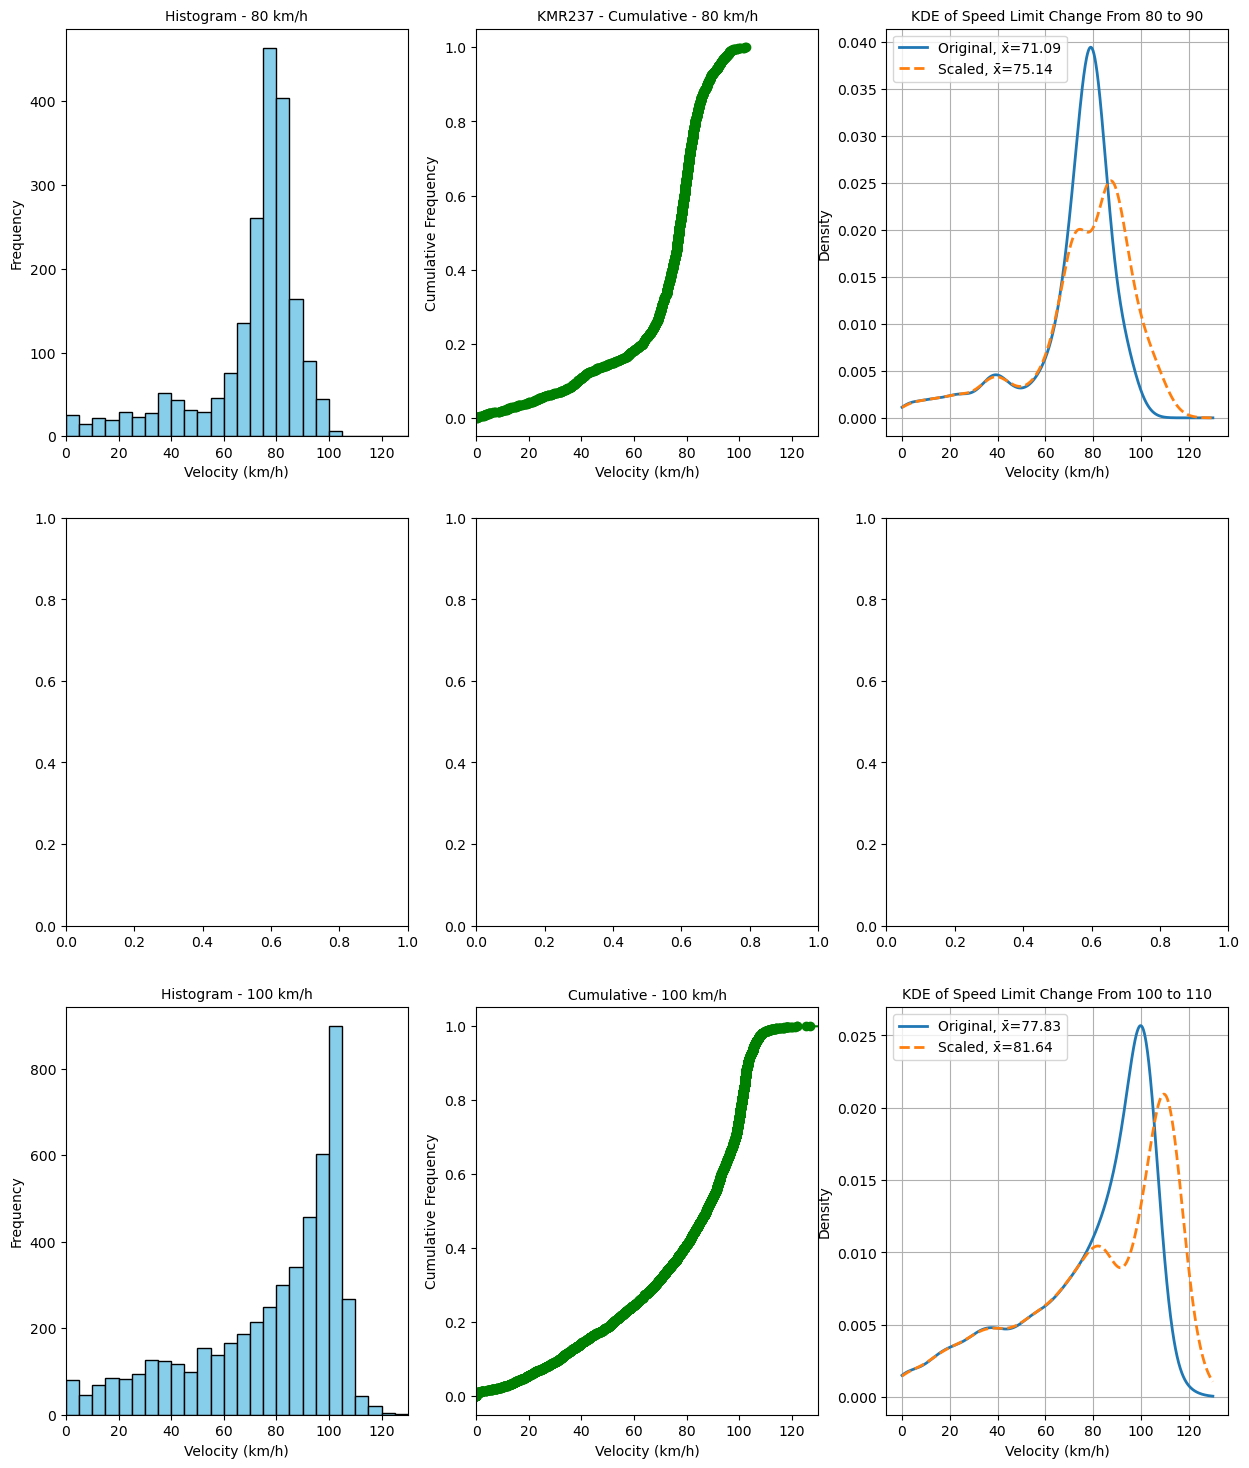

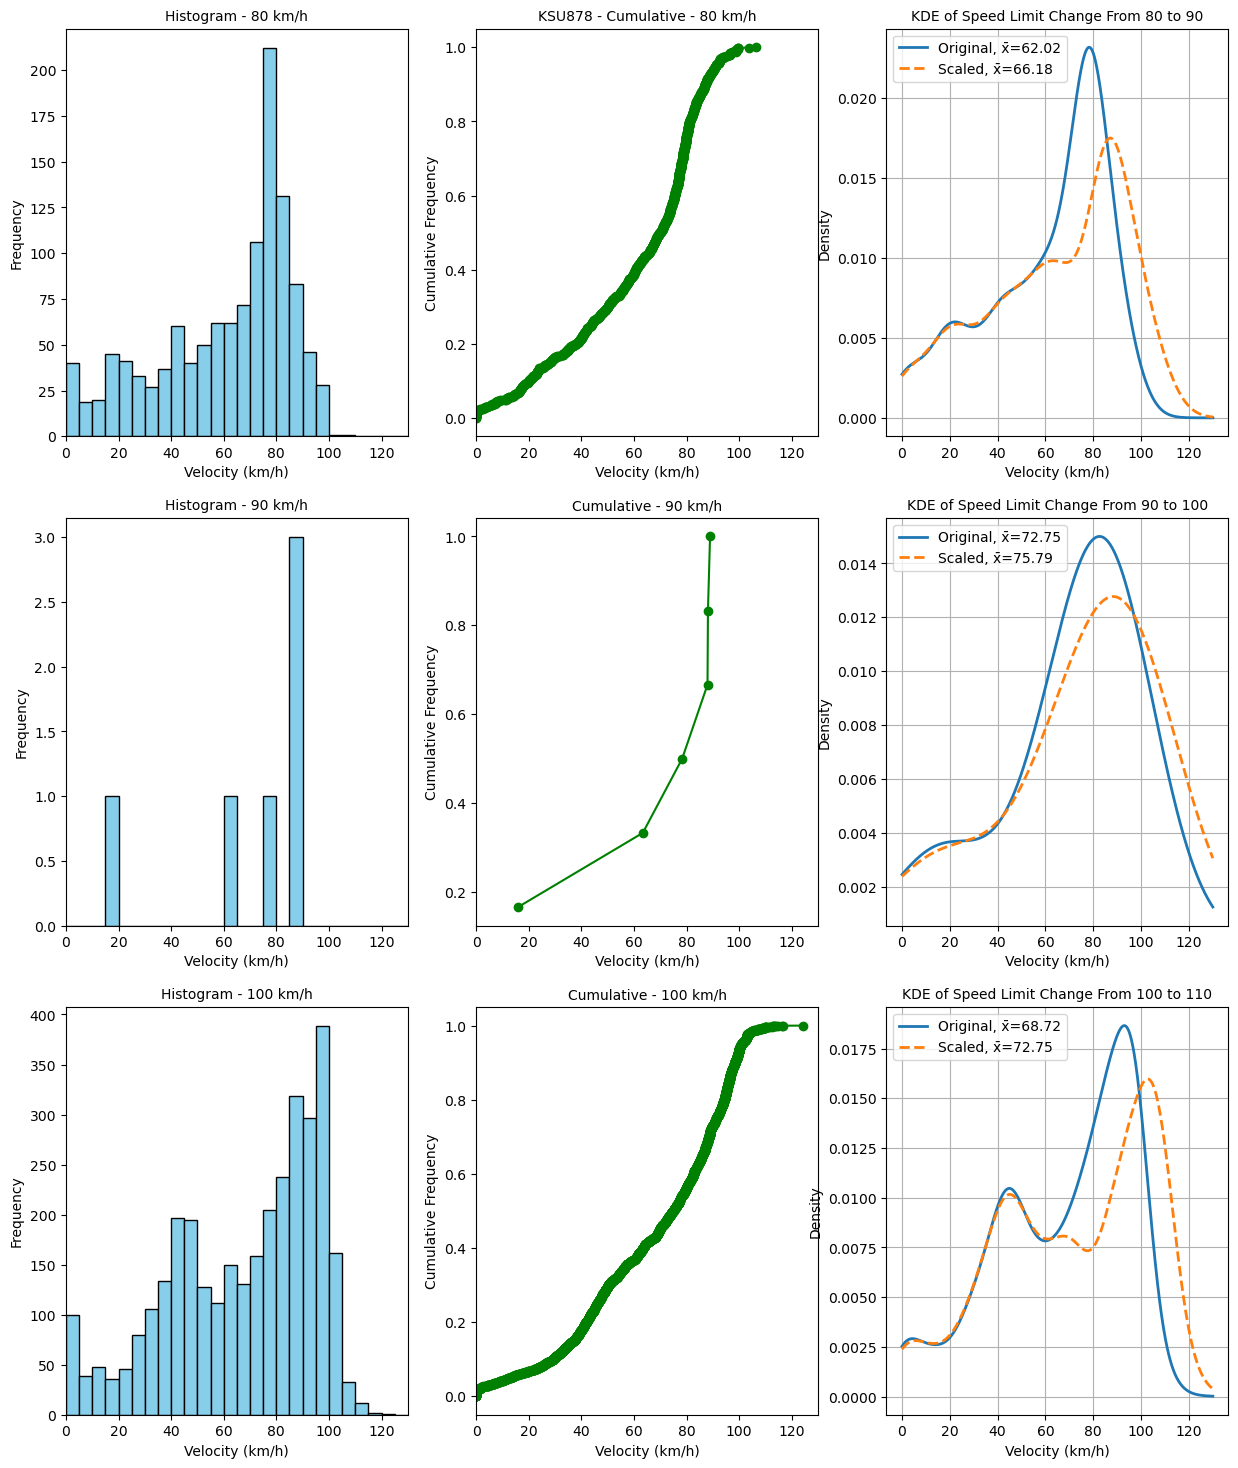

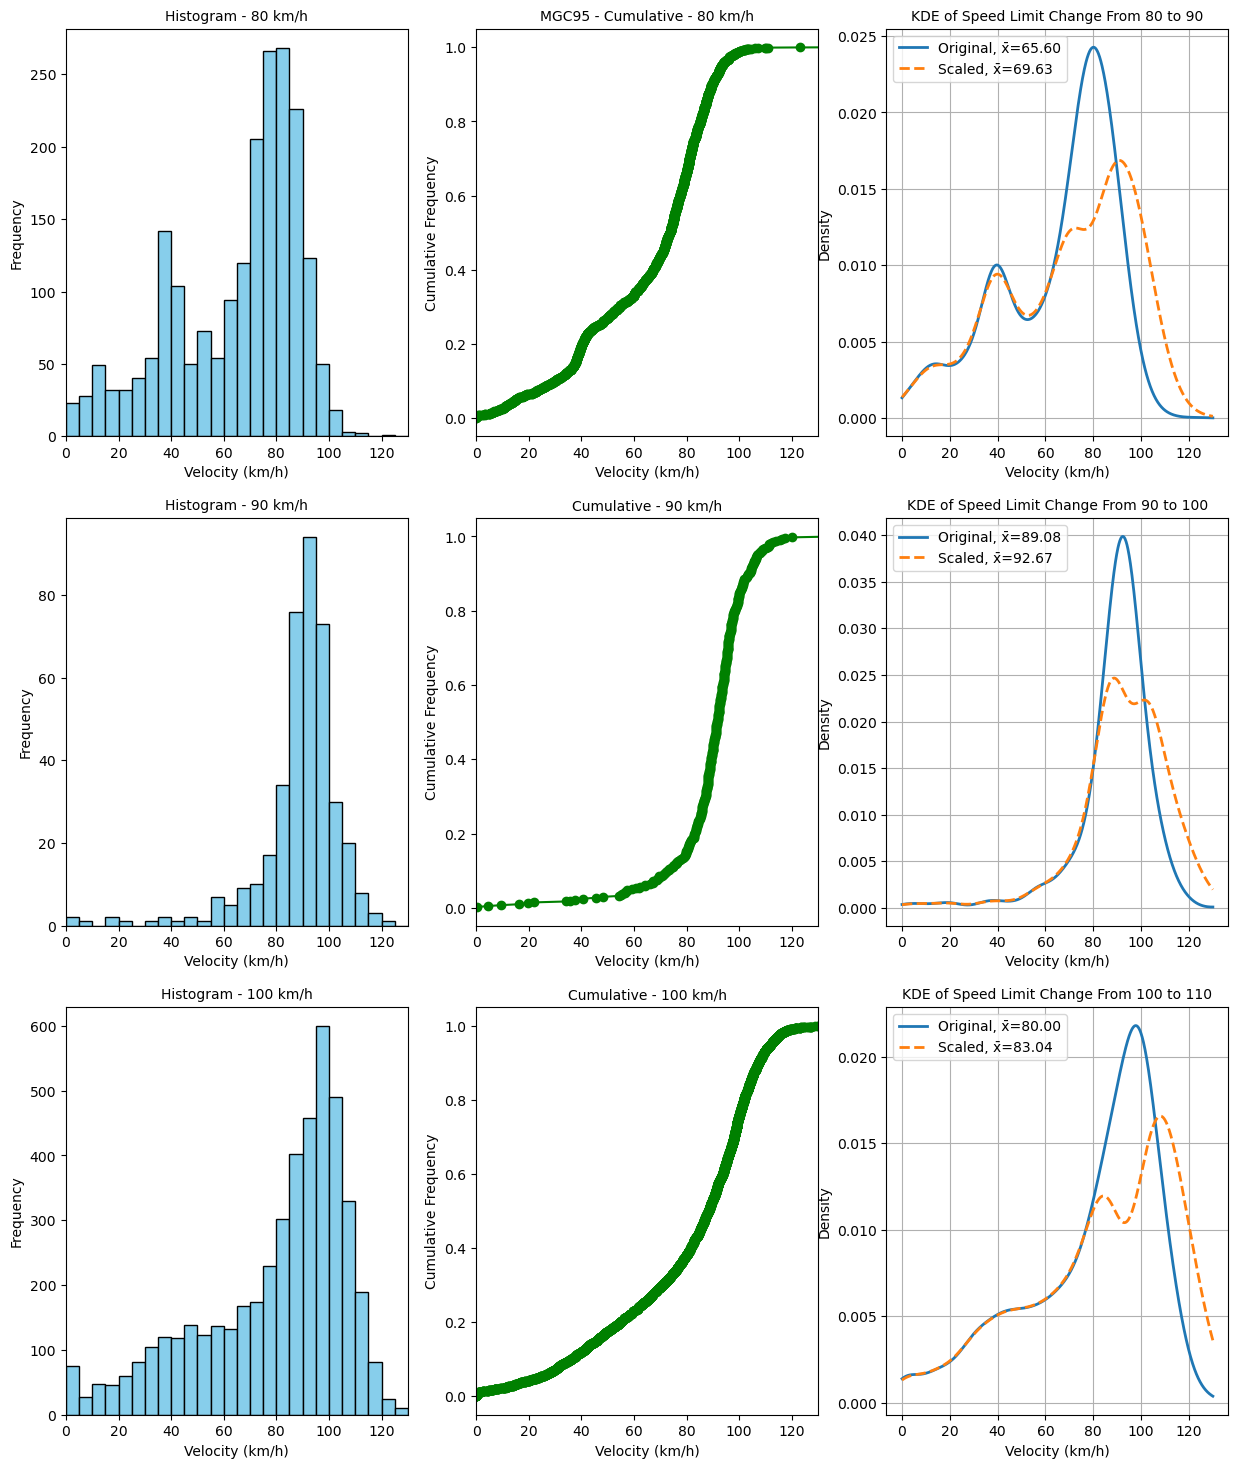

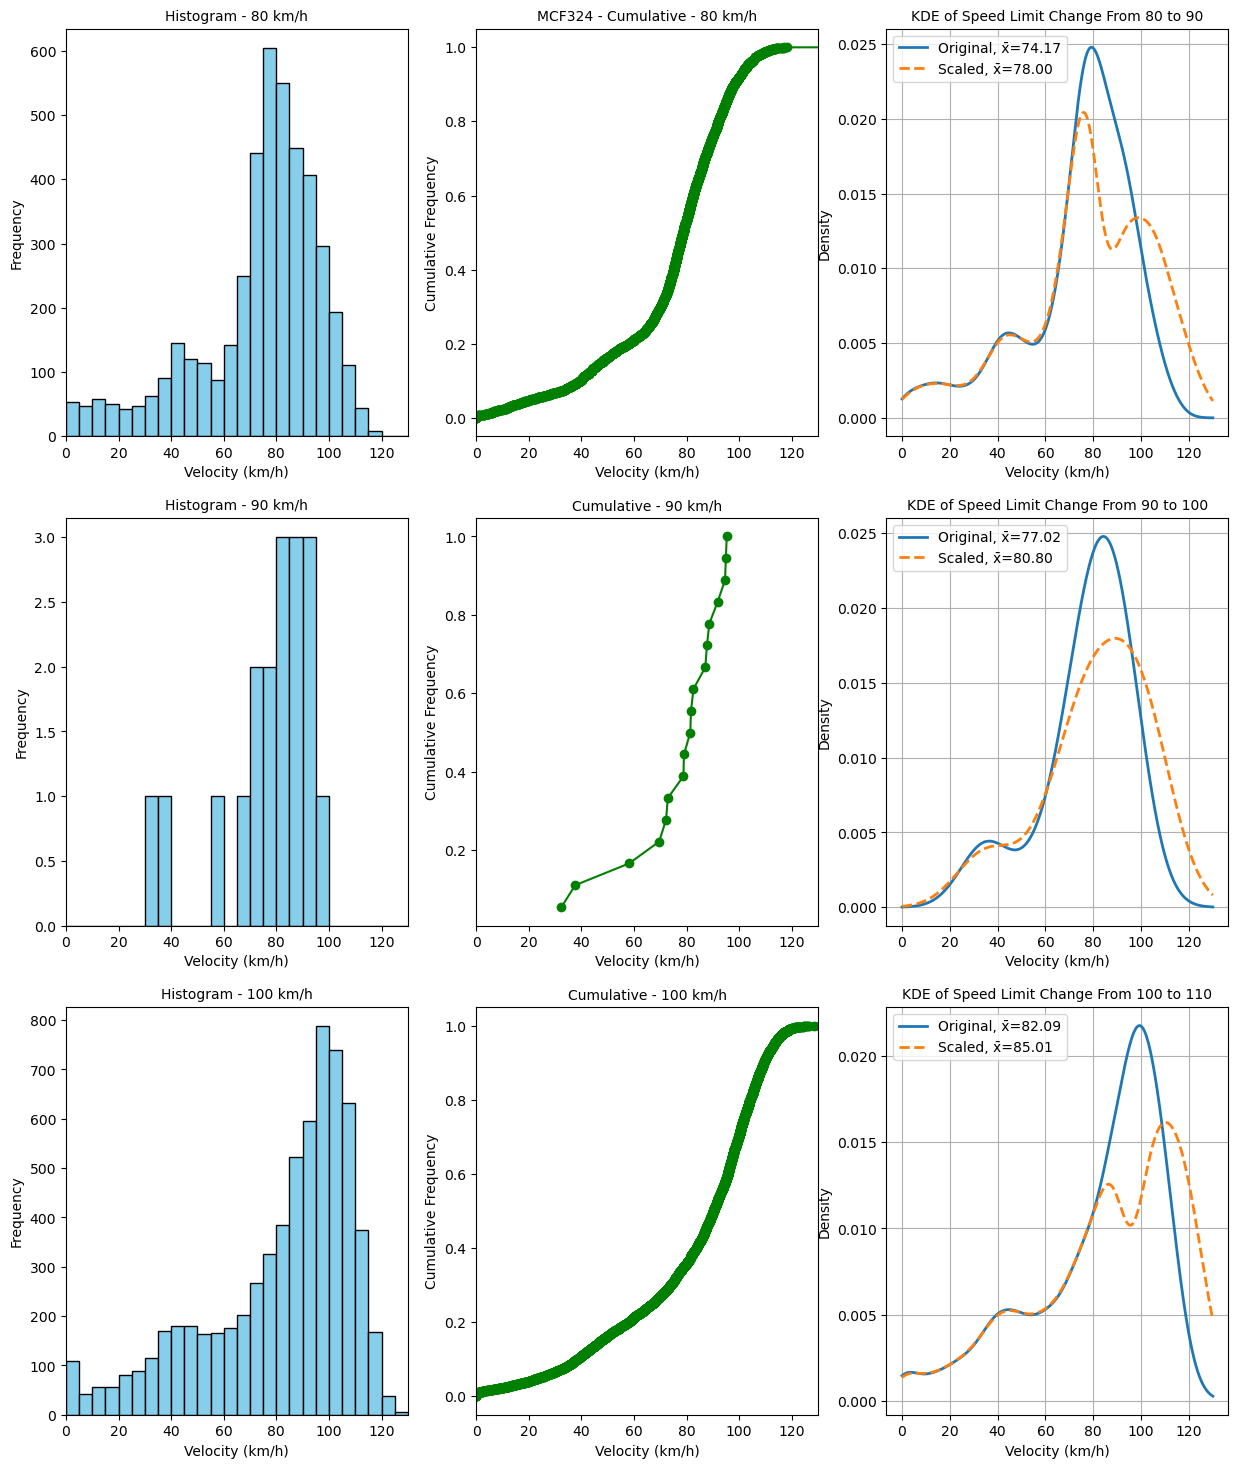

No data for plate JZD724 in 90 km/h zone.


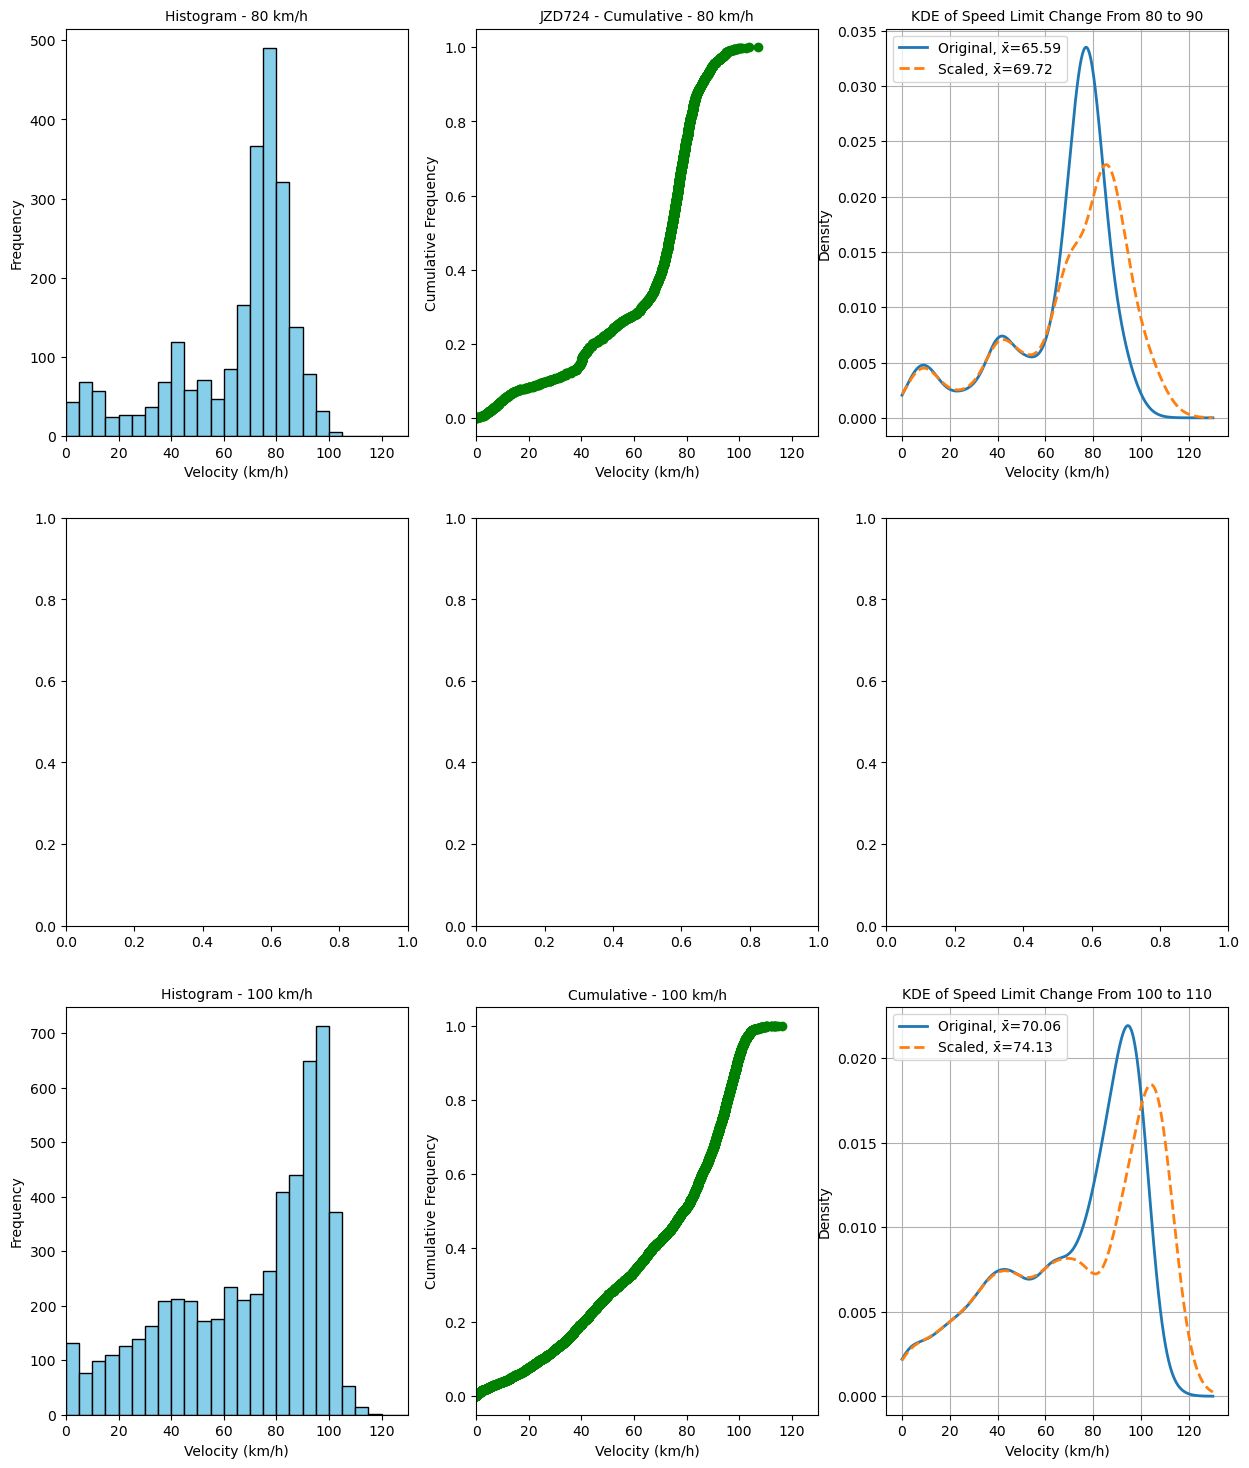

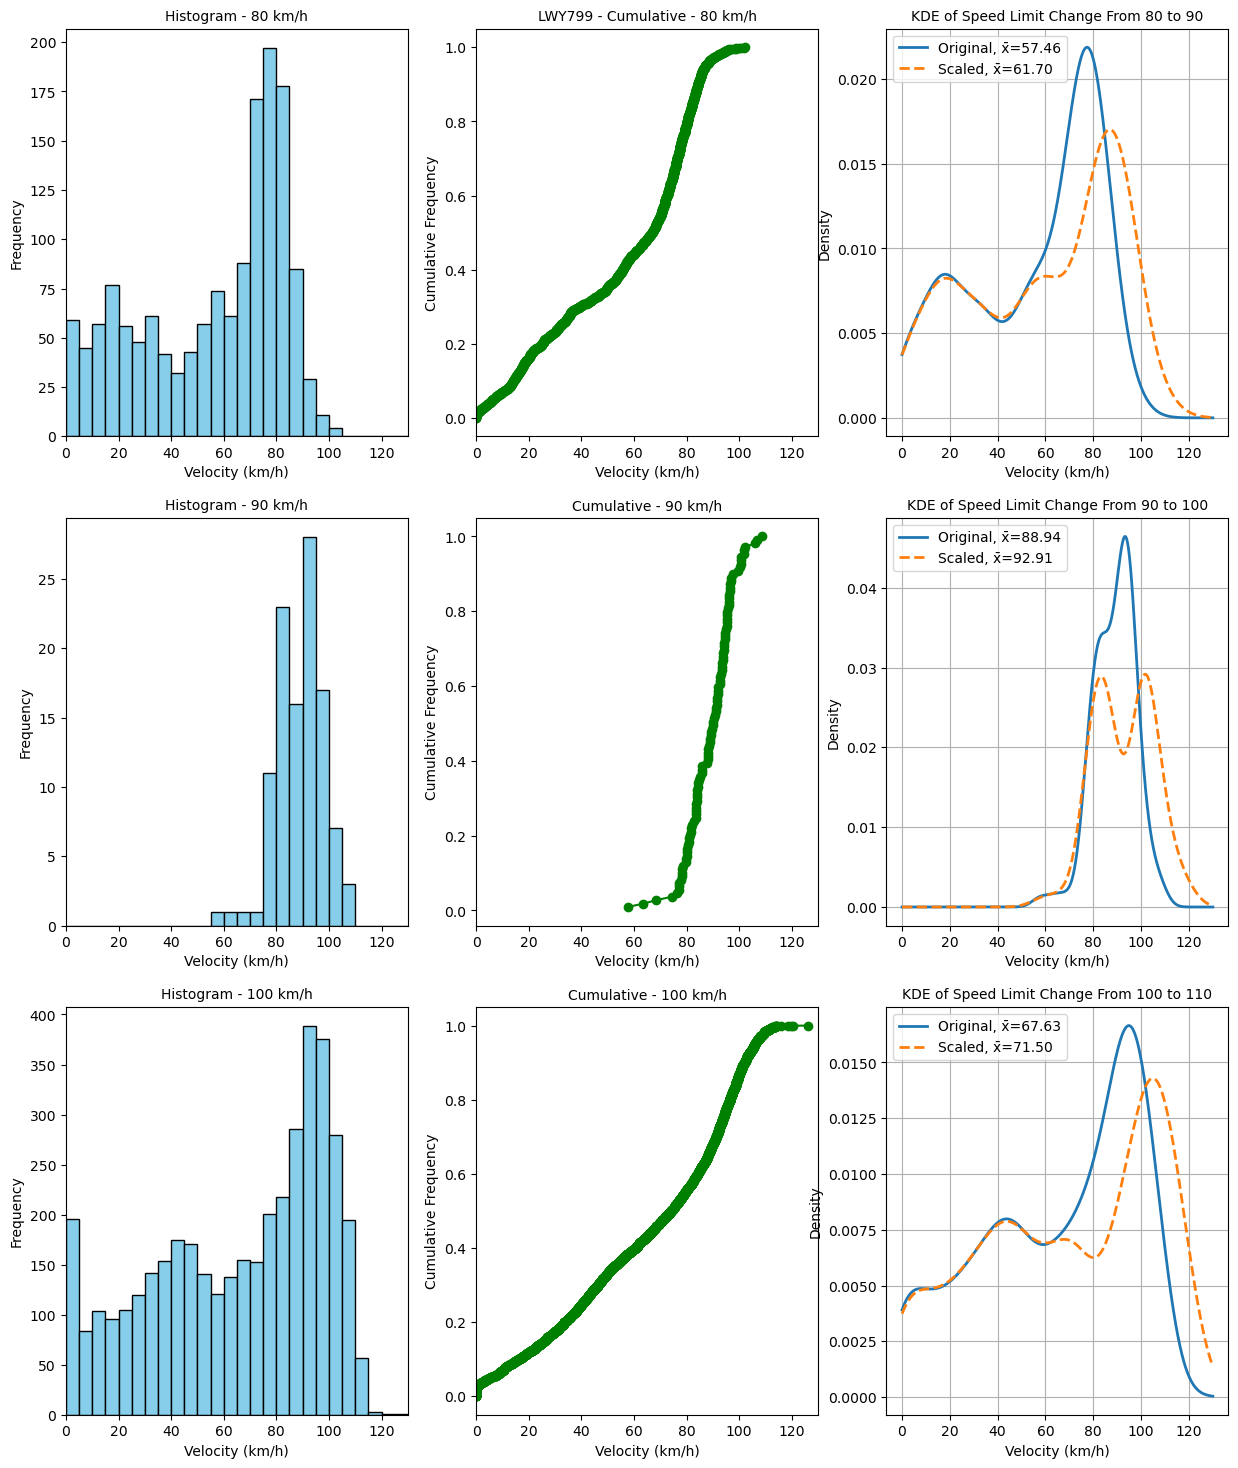

In [13]:
# List of license plates
plates = ['MHG998', 'JSJ858', 'LDG161', 'DLZ695', 'HLW912', 'HQW812', 
          'JRK947', 'KMR237', 'KSU878', 'MGC95', 'MCF324', 'JZD724', 'LWY799']

# Speed limit zones
zones = [80, 90, 100]

# Loop through each license plate
for plate in plates:
    data = merge_csvs(plate)
    
    # Create a single figure for the plate with 3 rows and 3 columns (for histograms, cumulative, and KDE)
    fig, axes = plt.subplots(3, 3, figsize=(15, 18))
    #fig.suptitle(f"{plate}")
    
    for i, zone in enumerate(zones):
        try:
            if zone == 100:
                # Filter data for the current speed limit zone
                zone_data = data[(data['speedLim_2'] == zone) & (data['speedLim_6'] != 'Default Area')]
                dataframe = zone_data[zone_data['velocity (km/h)'].notna()]
                dataframe = dataframe[~dataframe['velocity (km/h)'].isin([np.inf, -np.inf])]
                velocities = dataframe['velocity (km/h)']
            else: 
                # Filter data for the current speed limit zone
                zone_data = data[data['speedLim_2'] == zone]
                dataframe = zone_data[zone_data['velocity (km/h)'].notna()]
                dataframe = dataframe[~dataframe['velocity (km/h)'].isin([np.inf, -np.inf])]
                velocities = dataframe['velocity (km/h)']
            
            if velocities.empty:
                print(f"No data for plate {plate} in {zone} km/h zone.")
                continue
            
            # Plot Histogram
            ax_hist = axes[i, 0]
            bin_edges = np.arange(0, 130 + 5, 5)
            ax_hist.hist(velocities, bins=bin_edges, color='skyblue', edgecolor='black')
            ax_hist.set_title(f"Histogram - {zone} km/h", fontsize=10)
            ax_hist.set_xlim(0, 130)
            ax_hist.set_xlabel("Velocity (km/h)")
            ax_hist.set_ylabel("Frequency")
            
            # Plot Cumulative Frequency Curve
            ax_cumul = axes[i, 1]
            sorted_velocities = sorted(velocities)
            cumulative = [j / len(sorted_velocities) for j in range(1, len(sorted_velocities) + 1)]
            ax_cumul.plot(sorted_velocities, cumulative, marker='o', linestyle='-', color='green')
            if zone==80:
                ax_cumul.set_title(f"{plate} - Cumulative - {zone} km/h", fontsize=10)
            else:
                ax_cumul.set_title(f"Cumulative - {zone} km/h", fontsize=10)
            ax_cumul.set_xlim(0, 130)
            ax_cumul.set_xlabel("Velocity (km/h)")
            ax_cumul.set_ylabel("Cumulative Frequency")
            
            # Plot KDE
            vehicle = vehicles[plate]
            threshold = vehicle[f'{zone}_thres_smo'] 
            
            ax_kde = axes[i, 2]
            kde = gaussian_kde(velocities)
            velocity_range = np.linspace(0, 130, 1000)
            original_pdf = kde(velocity_range)
            
            # Define speed limits and threshold
            original_speed_limit = zone
            new_speed_limit = zone+10
            scaling_factor = new_speed_limit / original_speed_limit
            
            # Apply scaling to the original velocity data
            scaled_velocities = np.copy(velocities)
            scaled_velocities = dataframe.loc[(dataframe['speedLim_2'] == zone), 'velocity (km/h)'] = dataframe.loc[
                (dataframe['speedLim_2'] == zone), 'velocity (km/h)'].apply(lambda v: smooth_transition(v, threshold, scaling_factor) if v > threshold else v)
            
            # Recompute KDE for scaled velocities
            scaled_kde = gaussian_kde(scaled_velocities)
            scaled_pdf = scaled_kde(velocity_range)
            original_mean = np.sum(velocity_range * original_pdf) / np.sum(original_pdf)
            new_mean = np.sum(velocity_range * scaled_pdf) / np.sum(scaled_pdf)
            
            # Plot the original and scaled KDE
            ax_kde.plot(velocity_range, original_pdf, label=f"Original, x̄={original_mean:.2f}", lw=2)
            ax_kde.plot(velocity_range, scaled_pdf, label=f"Scaled, x̄={new_mean:.2f}", lw=2, linestyle='--')
            ax_kde.set_title(f"KDE of Speed Limit Change From {original_speed_limit} to {new_speed_limit}", fontsize=10)
            ax_kde.set_xlabel("Velocity (km/h)")
            ax_kde.set_ylabel("Density")
            ax_kde.legend(loc='best')
            ax_kde.grid(True)

        except Exception as e:
            print(f"Error processing plate {plate}: {e}")
        
    # Adjust layout and save the figure
    plt.savefig(f"Images/Graphs_for_{plate}.png")
    plt.show()

In [14]:
ratios = pd.read_csv(f'AAA_All_Vehicles_All_Models.csv')
#ratios = ratios[['VehicleName', 'VehicleClass', 'StartDate', 'EndDate', 'FuelObs','TrueTime', 'DistanceTravelled', 'FuelModel', 'Num_GPS_IGN_ON']]
ratios['Ratio'] = ratios['FuelObs']/ratios['FuelModel']
ratios_vehicle = []
ratios_class = []

# Exclude rows where ratio is greater than 2 or less than 0.5
ratios_filtered = ratios[(ratios['Ratio'] >= 0.5) & (ratios['Ratio'] <= 2)]
#ratios_filtered = ratios

# Summing and printing for each vehicle
for plate in ratios_filtered['VehicleName'].unique():
    apple = ratios_filtered[ratios_filtered['VehicleName'] == plate]
    pear = apple['VehicleClass'].unique()
    sum_obs = apple['FuelObs'].sum()
    std_obs = apple['FuelObs'].sum()
    sum_model = apple['FuelModel'].sum()
    ration = sum_obs/sum_model
    rations = apple['Ratio'].mean()
    std_ratio = apple['Ratio'].std()
    print(plate, pear, f'{sum_obs:.2f}[L]', f'{sum_model:.2f}[L]', f'{ration:.4f}:{rations:.4f}±{std_ratio:.2f}')
    ratios_vehicle.append((plate,ration))

# Summing and printing for each vehicle class
for clas in ratios_filtered['VehicleClass'].unique():
    apple = ratios_filtered[ratios_filtered['VehicleClass'] == clas]
    
    sum_obs = apple['FuelObs'].sum()
    sum_model = apple['FuelModel'].sum()
    ration = sum_obs/sum_model
    rations = apple['Ratio'].mean()
    std_ratio = apple['Ratio'].std()
    print(clas, f'{sum_obs:.2f}[L]', f'{sum_model:.2f}[L]', f'{ration:.4f}:{rations:.4f}±{std_ratio:.2f}')
    ratios_class.append((clas,ration))

print(ratios_vehicle)
print(ratios_class)

DLZ695 ['SUV'] 198.34[L] 166.11[L] 1.1940:1.2221±0.31
HLW912 ['SUV'] 1463.23[L] 1577.90[L] 0.9273:0.9419±0.18
HQW812 ['SUV'] 563.95[L] 622.21[L] 0.9064:0.9175±0.14
JRK947 ['SUV'] 482.36[L] 608.12[L] 0.7932:0.7889±0.12
JSJ858 ['Car'] 471.31[L] 537.93[L] 0.8762:0.9738±0.36
JZD724 ['SUV'] 755.84[L] 840.14[L] 0.8997:0.9353±0.29
KMR237 ['SUV'] 66.31[L] 84.49[L] 0.7848:0.7848±nan
KSU878 ['SUV'] 605.56[L] 640.38[L] 0.9456:0.9686±0.21
LDG161 ['Car'] 780.77[L] 676.60[L] 1.1540:1.1628±0.17
LWY799 ['SUV'] 917.44[L] 1034.17[L] 0.8871:0.9026±0.14
MCF324 ['SUV'] 554.27[L] 607.27[L] 0.9127:0.9200±0.12
MGC95 ['SUV'] 724.16[L] 873.09[L] 0.8294:0.8514±0.18
MHG998 ['Truck'] 133.28[L] 131.33[L] 1.0149:1.1184±0.46
SUV 6331.46[L] 7053.89[L] 0.8976:0.9191±0.20
Car 1252.08[L] 1214.52[L] 1.0309:1.0828±0.27
Truck 133.28[L] 131.33[L] 1.0149:1.1184±0.46
[('DLZ695', 1.1940166381929849), ('HLW912', 0.9273286985288233), ('HQW812', 0.9063622973770795), ('JRK947', 0.7931941758966734), ('JSJ858', 0.8761599200492841), (

In [15]:
def class_equations(classy, v):
    if classy == 'Truck':
        bea = 1.56 - 0.024 * v + 0.00011 * v ** 2  # diesel LCV N1-III (break equivalent acceleration)
        be = 804.2 * v ** (-0.309)  # Diesel LCV N1-III (another efficiency function)
        
    if classy == 'SUV':
        bea = 1.88 - 0.032 * v + 0.00016 * v ** 2  # diesel LCV N1-I (break equivalent acceleration)
        be = 481.7 * v ** (-0.202)  # Diesel LCV N1-I (another efficiency function)
        
    if classy == 'Car':
        bea = 0.4 - 0.006 * v + 0.000023 * v ** 2  # diesel PC (break equivalent acceleration)
        be = 1125 * v ** (-0.300)  # Diesel PC (another efficiency function)
        
    return bea, be

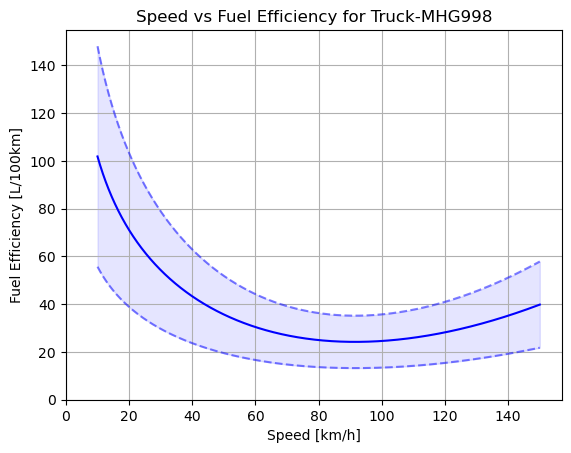

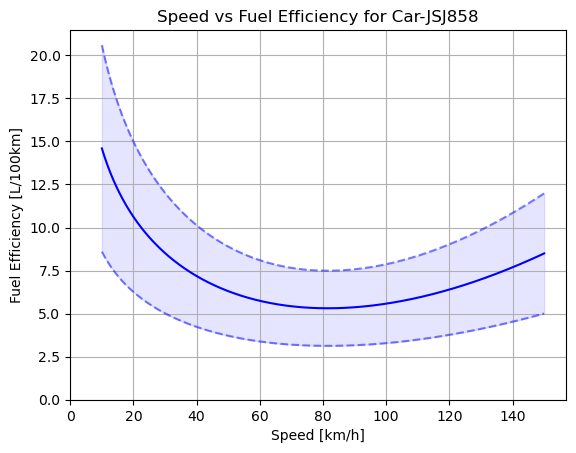

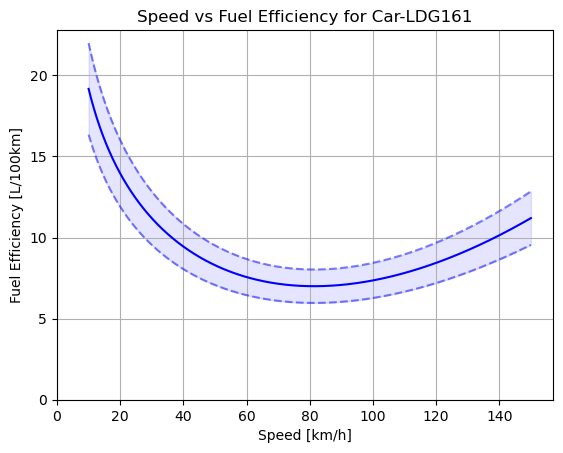

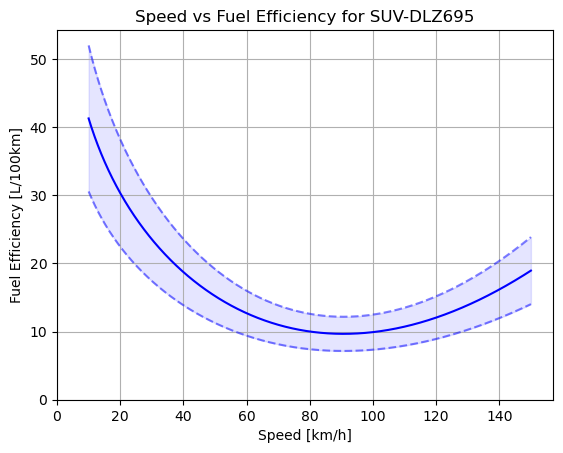

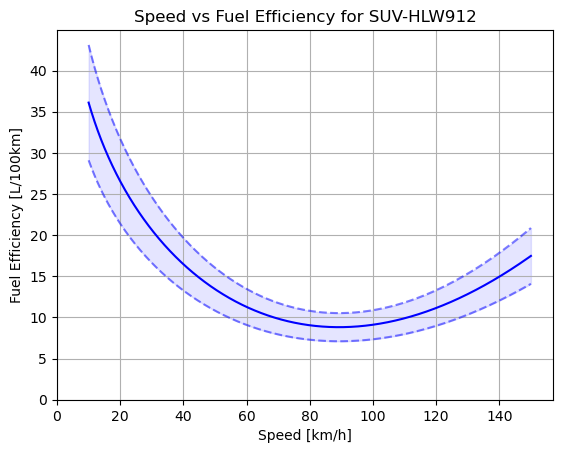

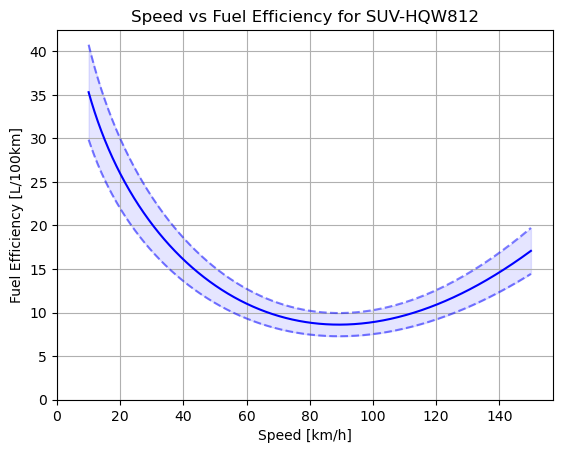

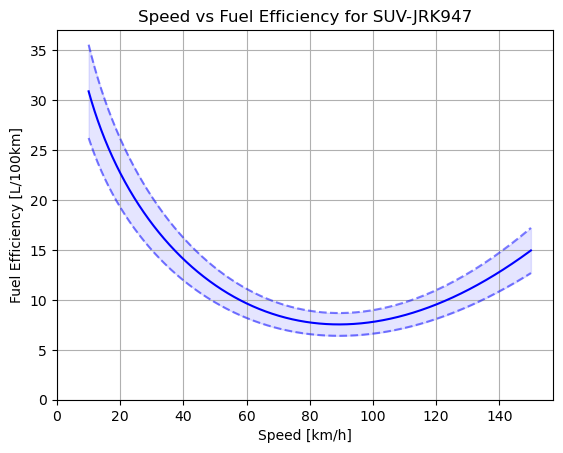

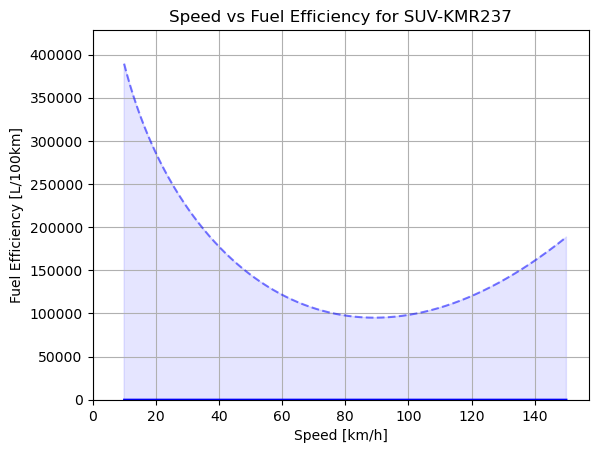

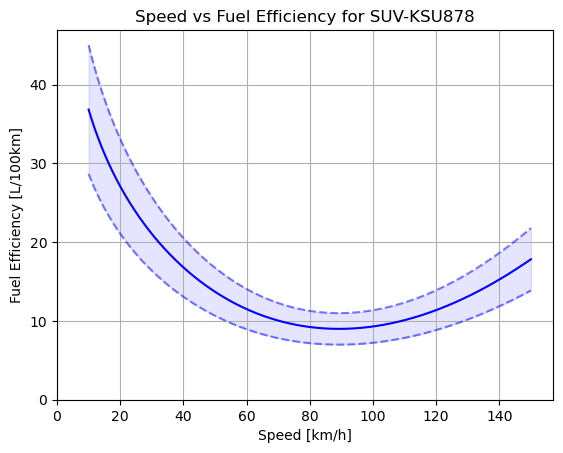

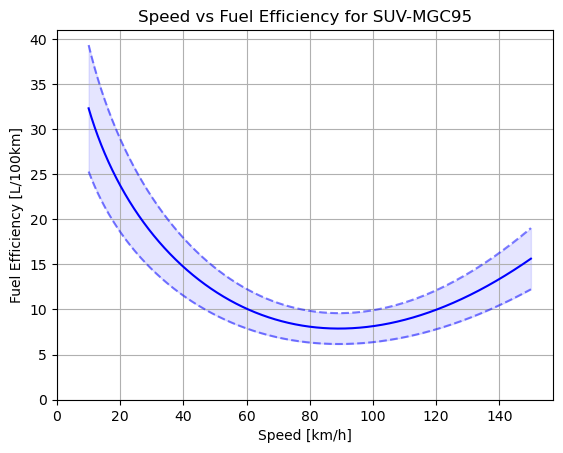

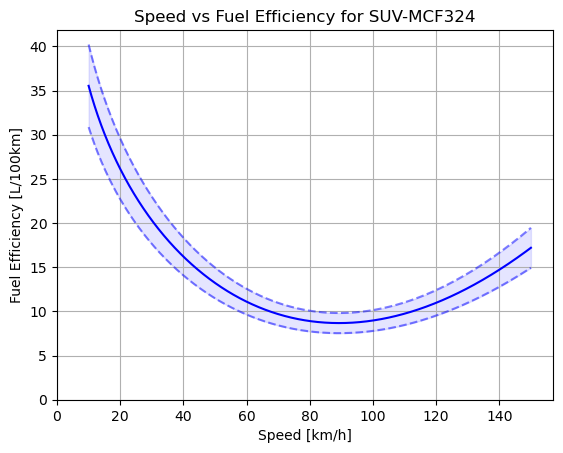

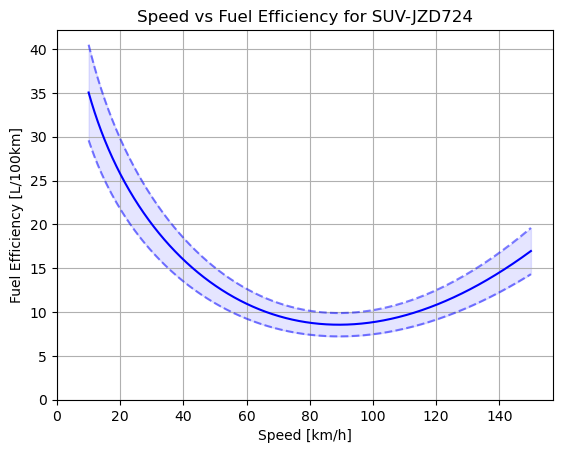

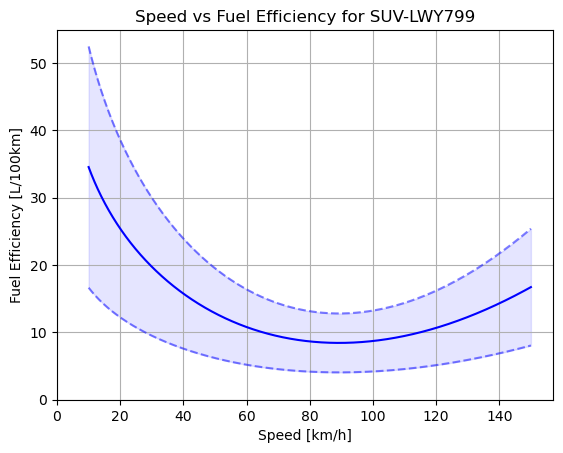

In [16]:
license_plates = list(vehicles.keys())  # Change this as needed
for license_plate in license_plates:
    # Extract vehicle details from the dictionary
    vehicle = vehicles[license_plate]
    mass = vehicle['mass']
    drag_coeff = vehicle['drag_coefficient']
    area = vehicle['area']
    r0 = vehicle['r0']
    r1 = vehicle['r1']
    
    # Extract thresholds
    value_80_smo = vehicle['80_thres_smo']
    value_90_smo = vehicle['90_thres_smo']
    value_100_smo = vehicle['100_thres_smo']
    classy = vehicle['class']
    ration = vehicle['ratio_plate']
    std = vehicle['std_plate']
    
    rho = 1.225  # air density (kg/m^3)
    m = mass
    m_rot = 0.03 * m  # rotational mass (3% of vehicle mass)
    A = area  # vehicle frontal area (m^2)
    g = 9.81  # gravitational acceleration (m/s^2)
    diesel_dens = 0.85  # diesel density (kg/L)
    r_0 = r0
    r_1 = r1
    Cd = drag_coeff  # drag coefficient
    diesel_dens = 0.85
    theta=0
    
    v = np.linspace(10,150,1400)
    bea, be = class_equations(classy, v)
    
    Fuel_upper = 0.000278 * (ration+std) * ((rho*Cd*A/2)*(v/3.6)**2 + m *g*(r_0+r_1*(v/3.6)) + m*g*np.sin(np.radians(theta)) + (m+m_rot)*bea)*be / (10 * diesel_dens)

    Fuel = 0.000278 * ration * ((rho*Cd*A/2)*(v/3.6)**2 + m *g*(r_0+r_1*(v/3.6)) + m*g*np.sin(np.radians(theta)) + (m+m_rot)*bea)*be / (10 * diesel_dens)

    Fuel_lower = 0.000278 * (ration-std) * ((rho*Cd*A/2)*(v/3.6)**2 + m *g*(r_0+r_1*(v/3.6)) + m*g*np.sin(np.radians(theta)) + (m+m_rot)*bea)*be / (10 * diesel_dens)

    fig,ax = plt.subplots()
    plt.plot(v, Fuel_upper, 'b--', alpha=0.5)
    plt.plot(v, Fuel, 'b')
    plt.plot(v, Fuel_lower, 'b--', alpha=0.5)
    plt.fill_between(v, Fuel_upper, Fuel_lower, color='blue', alpha=0.1)
    ax.grid(True)
    plt.xlabel(f'Speed [km/h]')
    plt.ylabel(f'Fuel Efficiency [L/100km]')
    plt.title(f'Speed vs Fuel Efficiency for {classy}-{license_plate}')
    plt.ylim(0)
    plt.xlim(0)
    #fig.savefig(f'Images/Speed_vs_Fuel_Efficiency_for_{classy}_{license_plate}_with_STD.png')

0.8976000000000001 0.2
SUV: Minimum Fuel = 8.409 L/100km at 89.4 km/h
1.0309 0.27
Car: Minimum Fuel = 6.252 L/100km at 81.5 km/h
1.0149 0.46
Truck: Minimum Fuel = 24.218 L/100km at 91.6 km/h


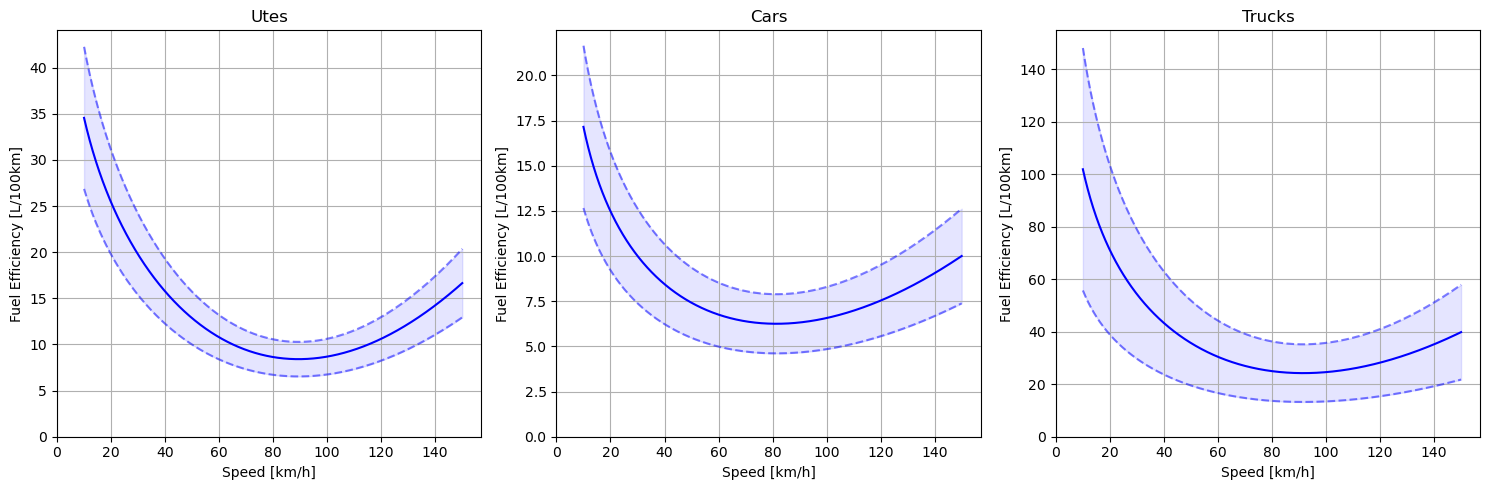

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Get unique vehicle classes
vehicle_classes = ['SUV', 'Car', 'Truck']
num_classes = len(vehicle_classes)

# Determine grid size (1 row, 3 columns)
cols = 3
rows = 1  # Fixed to 1 row

# Create a figure with subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 5))  # Adjust figure size for 1x3 layout
axes = axes.flatten()  # Flatten axes for easy indexing

# Iterate over vehicle classes and plot
for idx, vehicle_class in enumerate(vehicle_classes):
    if idx >= cols:  # Stop if there are more classes than columns
        break

    # Filter vehicles belonging to the current class
    class_vehicles = [vehicle for vehicle in vehicles.values() if vehicle['class'] == vehicle_class]
    
    # Calculate mean values for the required parameters
    mean_mass = np.mean([vehicle['mass'] for vehicle in class_vehicles])
    mean_drag_coeff = np.mean([vehicle['drag_coefficient'] for vehicle in class_vehicles])
    mean_area = np.mean([vehicle['area'] for vehicle in class_vehicles])
    mean_r0 = np.mean([vehicle['r0'] for vehicle in class_vehicles])
    mean_r1 = np.mean([vehicle['r1'] for vehicle in class_vehicles])
    mean_ratio = np.mean([vehicle['ratio_class'] for vehicle in class_vehicles])
    std = np.mean([vehicle['std_class'] for vehicle in class_vehicles if vehicle['std_class'] != 9999])
    print(mean_ratio, std)
    
    # Set constants
    rho = 1.225  # air density (kg/m^3)
    g = 9.81  # gravitational acceleration (m/s^2)
    diesel_dens = 0.85  # diesel density (kg/L)
    m_rot = 0.03 * mean_mass  # rotational mass (3% of vehicle mass)
    theta = 0  # assumed incline

    # Generate speed range
    v = np.linspace(10, 150, 1400)  # speed range (km/h)

    # Calculate fuel efficiency using class equations
    bea, be = class_equations(vehicle_class, v)  # Assuming `class_equations` returns required parameters
    
    Fuel_upper = 0.000278*(mean_ratio + std)*((rho*mean_drag_coeff*mean_area/2)*(v/3.6)**2 + mean_mass*g*(mean_r0+mean_r1*(v/3.6)) 
                                              + mean_mass*g*np.sin(np.radians(theta)) + (mean_mass+m_rot)*bea)*be/(10*diesel_dens)

    Fuel = 0.000278*(mean_ratio)*((rho*mean_drag_coeff*mean_area/2)*(v/3.6)**2 + mean_mass*g*(mean_r0+mean_r1*(v/3.6)) 
                                              + mean_mass*g*np.sin(np.radians(theta)) + (mean_mass+m_rot)*bea)*be/(10*diesel_dens)
    
    Fuel_lower = 0.000278*(mean_ratio - std)*((rho*mean_drag_coeff*mean_area/2)*(v/3.6)**2 + mean_mass*g*(mean_r0+mean_r1*(v/3.6)) 
                                              + mean_mass*g*np.sin(np.radians(theta)) + (mean_mass+m_rot)*bea)*be/(10*diesel_dens)

    min_fuel_idx = np.argmin(Fuel)
    min_fuel_value = Fuel[min_fuel_idx]
    min_fuel_speed = v[min_fuel_idx]
    
    print(f"{vehicle_class}: Minimum Fuel = {min_fuel_value:.3f} L/100km at {min_fuel_speed:.1f} km/h")

    # Plot on the current subplot
    ax = axes[idx]
    
    ax.plot(v, Fuel, 'b', label=f"{vehicle_class}")
    ax.plot(v, Fuel_upper, 'b--', alpha=0.5)
    ax.plot(v, Fuel_lower, 'b--', alpha=0.5)
    ax.fill_between(v, Fuel_upper, Fuel_lower, color='blue', alpha=0.1)
    
    ax.grid(True)
    ax.set_xlabel("Speed [km/h]")
    ax.set_ylabel("Fuel Efficiency [L/100km]")
    if vehicle_class == 'SUV':
        ax.set_title(f"Utes")
    else:
        ax.set_title(f"{vehicle_class}s")
    ax.set_ylim(0)
    ax.set_xlim(0)

# Hide unused subplots if there are fewer than 3 classes
for ax in axes[num_classes:]:
    ax.axis("off")

# Adjust layout and save the figure
fig.tight_layout()
#fig.suptitle("Speed vs Fuel Efficiency for Different Vehicle Types", fontsize=16, y=1.02)  # Adjust title position
#fig.savefig("Images/Speed_vs_Fuel_Efficiency_for_Different_Vehicle_Types_with_STD.png", bbox_inches="tight")
plt.show()

SUV 0.8976000000000001 0.2 2249.5 0.464734 2.5025999999999997 0.009999999999999998 0.000225
Truck 1.0149 0.46 5250.0 0.7 5.285 0.01057 8.686e-05
Car 1.0309 0.27 2035.0 0.34 2.46 0.008765 0.0001015


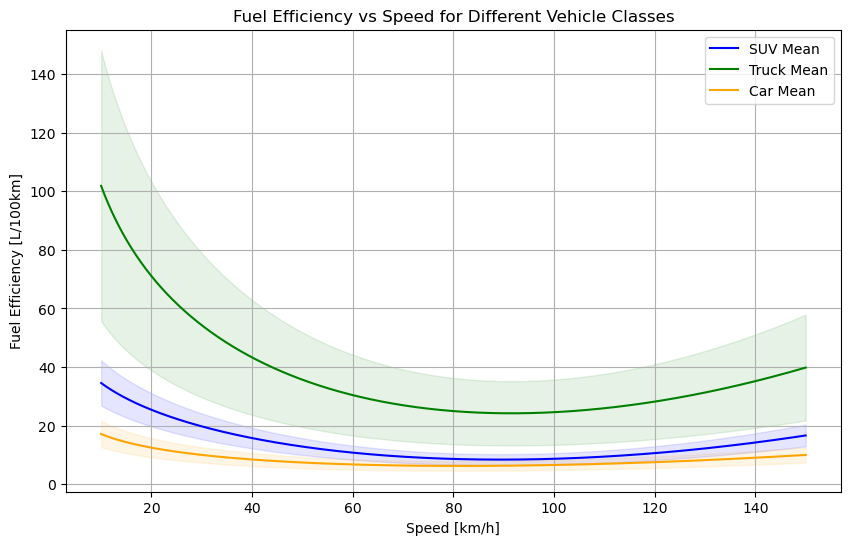

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Example vehicle class data
vehicle_classes = list(set(vehicle['class'] for vehicle in vehicles.values()))

# Create a single figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Define the list of colors to use (you can add more colors if you have more vehicle classes)
colors = ['blue', 'green', 'orange']

# Iterate over vehicle classes and plot
for idx, vehicle_class in enumerate(vehicle_classes):
    # Filter vehicles belonging to the current class
    class_vehicles = [vehicle for vehicle in vehicles.values() if vehicle['class'] == vehicle_class]
    
    # Calculate mean values for the required parameters
    mean_mass = np.mean([vehicle['mass'] for vehicle in class_vehicles])
    mean_drag_coeff = np.mean([vehicle['drag_coefficient'] for vehicle in class_vehicles])
    mean_area = np.mean([vehicle['area'] for vehicle in class_vehicles])
    mean_r0 = np.mean([vehicle['r0'] for vehicle in class_vehicles])
    mean_r1 = np.mean([vehicle['r1'] for vehicle in class_vehicles])
    mean_ratio = np.mean([vehicle['ratio_class'] for vehicle in class_vehicles])
    std = np.mean([vehicle['std_class'] for vehicle in class_vehicles if vehicle['std_class'] != 9999])
    print(vehicle_class, mean_ratio, std,mean_mass, mean_drag_coeff, mean_area, mean_r0, mean_r1)

    # Set constants
    rho = 1.225  # air density (kg/m^3)
    g = 9.81  # gravitational acceleration (m/s^2)
    diesel_dens = 0.85  # diesel density (kg/L)
    m_rot = 0.03 * mean_mass  # rotational mass (3% of vehicle mass)
    theta = 0  # assumed incline

    # Generate speed range
    v = np.linspace(10, 150, 1400)  # speed range (km/h)

    # Calculate fuel efficiency using class equations
    bea, be = class_equations(vehicle_class, v)  # Assuming `class_equations` returns required parameters
    
    Fuel_upper = 0.000278*(mean_ratio + std)*((rho*mean_drag_coeff*mean_area/2)*(v/3.6)**2 + mean_mass*g*(mean_r0+mean_r1*(v/3.6)) 
                                              + mean_mass*g*np.sin(np.radians(theta)) + (mean_mass+m_rot)*bea)*be/(10*diesel_dens)

    Fuel = 0.000278*(mean_ratio)*((rho*mean_drag_coeff*mean_area/2)*(v/3.6)**2 + mean_mass*g*(mean_r0+mean_r1*(v/3.6)) 
                                              + mean_mass*g*np.sin(np.radians(theta)) + (mean_mass+m_rot)*bea)*be/(10*diesel_dens)
    
    Fuel_lower = 0.000278*(mean_ratio - std)*((rho*mean_drag_coeff*mean_area/2)*(v/3.6)**2 + mean_mass*g*(mean_r0+mean_r1*(v/3.6)) 
                                              + mean_mass*g*np.sin(np.radians(theta)) + (mean_mass+m_rot)*bea)*be/(10*diesel_dens)

    # Plot the results on the same axis with the specified color
    ax.plot(v, Fuel, label=f"{vehicle_class} Mean", color=colors[idx % len(colors)])
    #ax.plot(v, Fuel_upper, '--',  alpha=0.5, label=f"{vehicle_class} Upper Bound", color=colors[idx % len(colors)])
    #ax.plot(v, Fuel_lower, '--', alpha=0.5, label=f"{vehicle_class} Lower Bound", color=colors[idx % len(colors)])
    ax.fill_between(v, Fuel_upper, Fuel_lower, alpha=0.1, color=colors[idx % len(colors)])

# Set axis labels and title
ax.set_xlabel("Speed [km/h]")
ax.set_ylabel("Fuel Efficiency [L/100km]")
ax.set_title("Fuel Efficiency vs Speed for Different Vehicle Classes")

# Show legend
ax.legend()
#plt.savefig(f"Speed_vs_Fuel_Efficiency_single_plot_with_STD.png")
# Show the plot
plt.grid(True)
plt.show()

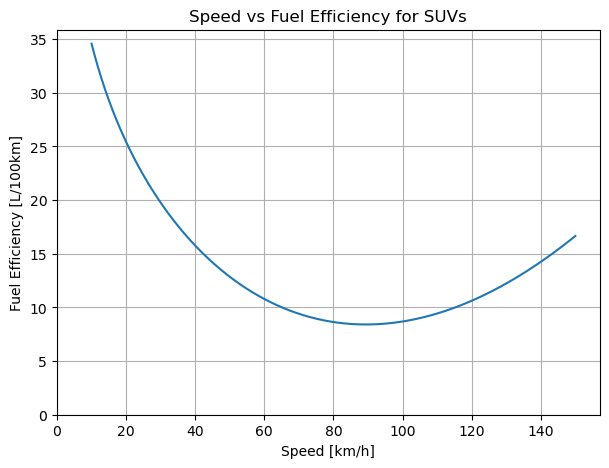

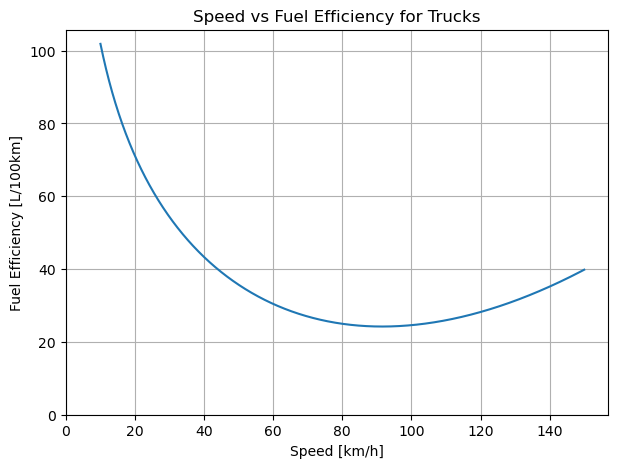

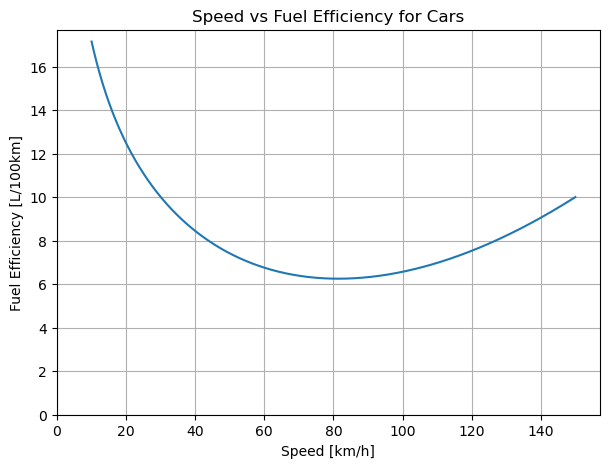

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Get unique vehicle classes
vehicle_classes = list(set(vehicle['class'] for vehicle in vehicles.values()))

# Set constants
rho = 1.225  # air density (kg/m^3)
g = 9.81  # gravitational acceleration (m/s^2)
diesel_dens = 0.85  # diesel density (kg/L)
theta = 0  # assumed incline

# Generate speed range
v = np.linspace(10, 150, 1400)  # speed range (km/h)

# Iterate over vehicle classes and create a separate figure for each
for vehicle_class in vehicle_classes:
    # Filter vehicles belonging to the current class
    class_vehicles = [vehicle for vehicle in vehicles.values() if vehicle['class'] == vehicle_class]
    
    # Calculate mean values for the required parameters
    mean_mass = np.mean([vehicle['mass'] for vehicle in class_vehicles])
    mean_drag_coeff = np.mean([vehicle['drag_coefficient'] for vehicle in class_vehicles])
    mean_area = np.mean([vehicle['area'] for vehicle in class_vehicles])
    mean_r0 = np.mean([vehicle['r0'] for vehicle in class_vehicles])
    mean_r1 = np.mean([vehicle['r1'] for vehicle in class_vehicles])
    mean_ratio = np.mean([vehicle['ratio_class'] for vehicle in class_vehicles])
    std = np.mean([vehicle['std_class'] for vehicle in class_vehicles if vehicle['std_class'] != 9999])
    m_rot = 0.03 * mean_mass  # rotational mass (3% of vehicle mass)
    
    # Calculate fuel efficiency using class equations
    bea, be = class_equations(vehicle_class, v)  # Assuming `class_equations` returns required parameters
    
    Fuel_upper = 0.000278 * (mean_ratio + std) * ((rho * mean_drag_coeff * mean_area / 2) * (v / 3.6) ** 2 +
        mean_mass * g * (mean_r0 + mean_r1 * (v / 3.6)) + mean_mass * g * np.sin(np.radians(theta)) +
        (mean_mass + m_rot) * bea) * be / (10 * diesel_dens)
    
    Fuel = 0.000278 * mean_ratio * ((rho * mean_drag_coeff * mean_area / 2) * (v / 3.6) ** 2 +
        mean_mass * g * (mean_r0 + mean_r1 * (v / 3.6)) + mean_mass * g * np.sin(np.radians(theta)) +
        (mean_mass + m_rot) * bea) * be / (10 * diesel_dens)
    
    Fuel_lower = 0.000278 * (mean_ratio - std) * ((rho * mean_drag_coeff * mean_area / 2) * (v / 3.6) ** 2 +
        mean_mass * g * (mean_r0 + mean_r1 * (v / 3.6)) + mean_mass * g * np.sin(np.radians(theta)) +
        (mean_mass + m_rot) * bea) * be / (10 * diesel_dens)
    
    # Create a separate figure for the vehicle class
    plt.figure(figsize=(7, 5))
    plt.plot(v, Fuel, label=f"{vehicle_class}")
   # plt.plot(v, Fuel_upper, 'b--', alpha=0.5)
   # plt.plot(v, Fuel_lower, 'b--', alpha=0.5)
   # plt.fill_between(v, Fuel_upper, Fuel_lower, color='blue', alpha=0.1)
    
    plt.grid(True)
    plt.xlabel("Speed [km/h]")
    plt.ylabel("Fuel Efficiency [L/100km]")
    plt.title(f"Speed vs Fuel Efficiency for {vehicle_class}s")
    plt.ylim(0)
    plt.xlim(0)
    #plt.legend()
    
    # Save the figure
    #plt.savefig(f"Images/Speed_vs_Fuel_Efficiency_{vehicle_class}.png", bbox_inches="tight")
    plt.show()